# Time Series Correlation

Code from [Towards Data Science](https://towardsdatascience.com/four-ways-to-quantify-synchrony-between-time-series-data-b99136c4a9c9)

Other resources:
[Applied Time Series Analysis](https://nwfsc-timeseries.github.io/atsa-labs/sec-tslab-correlation-within-and-among-time-series.html)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import os
import glob

home_dir = os.getenv("HOME")
home_dir

'/Users/megmcmahon'

In [2]:
home_dir + "/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/*.csv"

'/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/*.csv'

In [3]:
act_files = glob.glob(home_dir + "/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/*.csv")
act_files[0:5]

['/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10011_10_24_2019_4_30_00_PM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10012_10_18_2019_3_30_00_PM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10014_11_11_2019_5_20_00_PM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10016_1_24_2020_11_45_00_AM_New_Analysis.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/actiwatch/act_files/10023_11_11_2019_1_50_00_PM_New_Analysis.csv']

In [4]:
# resample actiwatch data to 1 minute bins

act = pd.read_csv(act_files[1], skiprows=156)
act['Time'] = pd.to_datetime(act['Date'] + ' ' + act['Time'])
act = act.set_index(act['Time'])
act = act.resample('1T').sum()
act[0:5]

,Line,Activity,Sleep/Wake,Unnamed: 6
Time,,,,
2019-10-18 15:30:00,3,335.0,0.0,0.0
2019-10-18 15:31:00,7,478.0,0.0,0.0
2019-10-18 15:32:00,11,77.0,2.0,0.0
2019-10-18 15:33:00,15,109.0,2.0,0.0
2019-10-18 15:34:00,19,613.0,2.0,0.0


In [5]:
fitbit_files = glob.glob(home_dir + "/Box/CogNeuroLab/Wearables/data/fitbit/*minuteStepsNarrow*", recursive=True)
fitbit_files[0:15]

['/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10011_minuteStepsNarrow_20190901_20201020.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10012_minuteStepsNarrow_20190901_20201020.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10014_minuteStepsNarrow_20190901_20201020.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10016_minuteStepsNarrow_20190901_20201020.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10023_minuteStepsNarrow_20190901_20201020.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10024_minuteStepsNarrow_20190901_20201020.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10025_minuteStepsNarrow_20190901_20201020.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10033_minuteStepsNarrow_20190901_20201020.csv',
 '/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/fitbit/WA_10035_minuteStepsNarrow_20190901_20201020.csv',
 '/Users/megmcmahon

In [6]:
fit = pd.read_csv(fitbit_files[1])
fit['Time'] = pd.to_datetime(fit['ActivityMinute'])
fit['Activity'] = fit['Steps']
fit = fit.set_index(fit['Time'])
fit[0:5]

,ActivityMinute,Steps,Time,Activity
Time,,,,
2019-10-18 00:00:00,10/18/2019 12:00:00 AM,0,2019-10-18 00:00:00,0
2019-10-18 00:01:00,10/18/2019 12:01:00 AM,0,2019-10-18 00:01:00,0
2019-10-18 00:02:00,10/18/2019 12:02:00 AM,0,2019-10-18 00:02:00,0
2019-10-18 00:03:00,10/18/2019 12:03:00 AM,0,2019-10-18 00:03:00,0
2019-10-18 00:04:00,10/18/2019 12:04:00 AM,0,2019-10-18 00:04:00,0


In [7]:
df = []
df = pd.merge(act, fit, how='inner', left_index=True, right_index=True, suffixes = ('_Act', '_Fit'))
df = df[['Activity_Act', 'Activity_Fit']]
df[0:5]

,Activity_Act,Activity_Fit
Time,,
2019-10-18 15:30:00,335.0,105
2019-10-18 15:31:00,478.0,90
2019-10-18 15:32:00,77.0,13
2019-10-18 15:33:00,109.0,0
2019-10-18 15:34:00,613.0,80


### Check missing values

In [8]:
print('Subject missing %s values from Actiwatch' % df['Activity_Act'].isnull().sum())
print('Subject missing %s values from Fitbit' % df['Activity_Fit'].isnull().sum())

Subject missing 0 values from Actiwatch
Subject missing 0 values from Fitbit


In [9]:
overall_pearson_r = df.corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# out: Pandas computed Pearson r: 0.2058774513561943

r, p = stats.pearsonr(df.dropna()['Activity_Act'], df.dropna()['Activity_Fit'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# out: Scipy comput

Pandas computed Pearson r: 0.7624352988259909
Scipy computed Pearson r: 0.7624352988259291 and p-value: 0.0


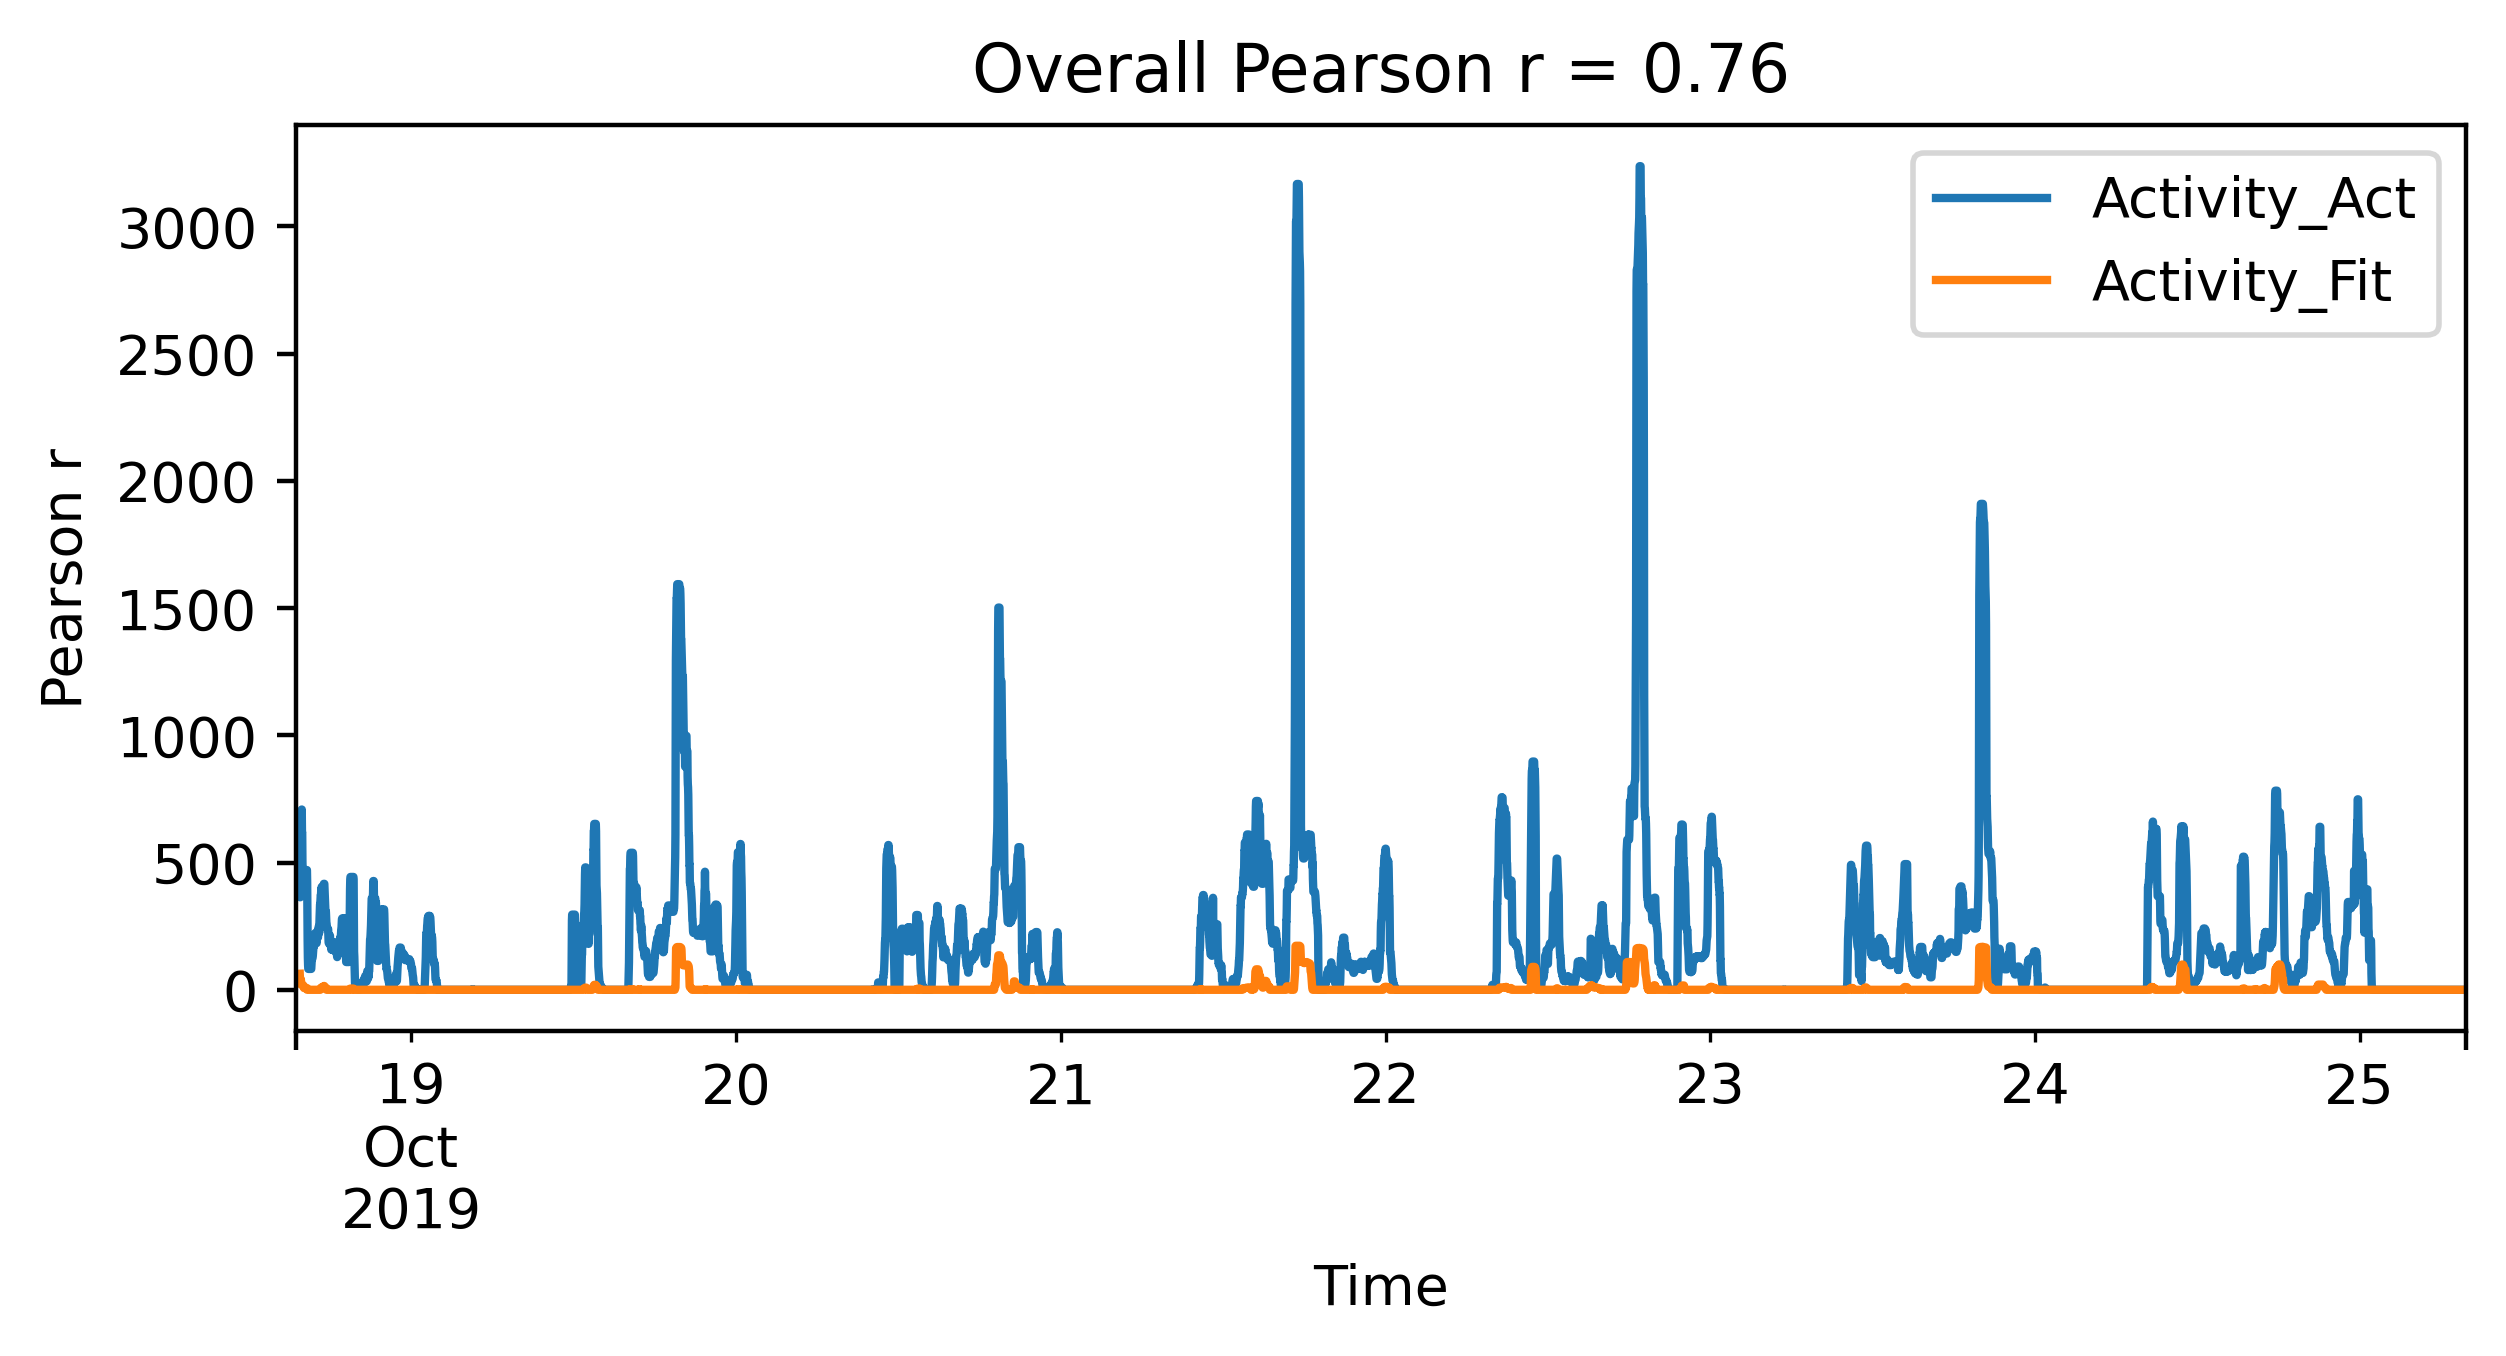

In [10]:
f,ax=plt.subplots(figsize=(7,3), dpi=400)
df.rolling(window=30,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

Text(0.5, 0.98, 'Activity data and rolling window correlation')

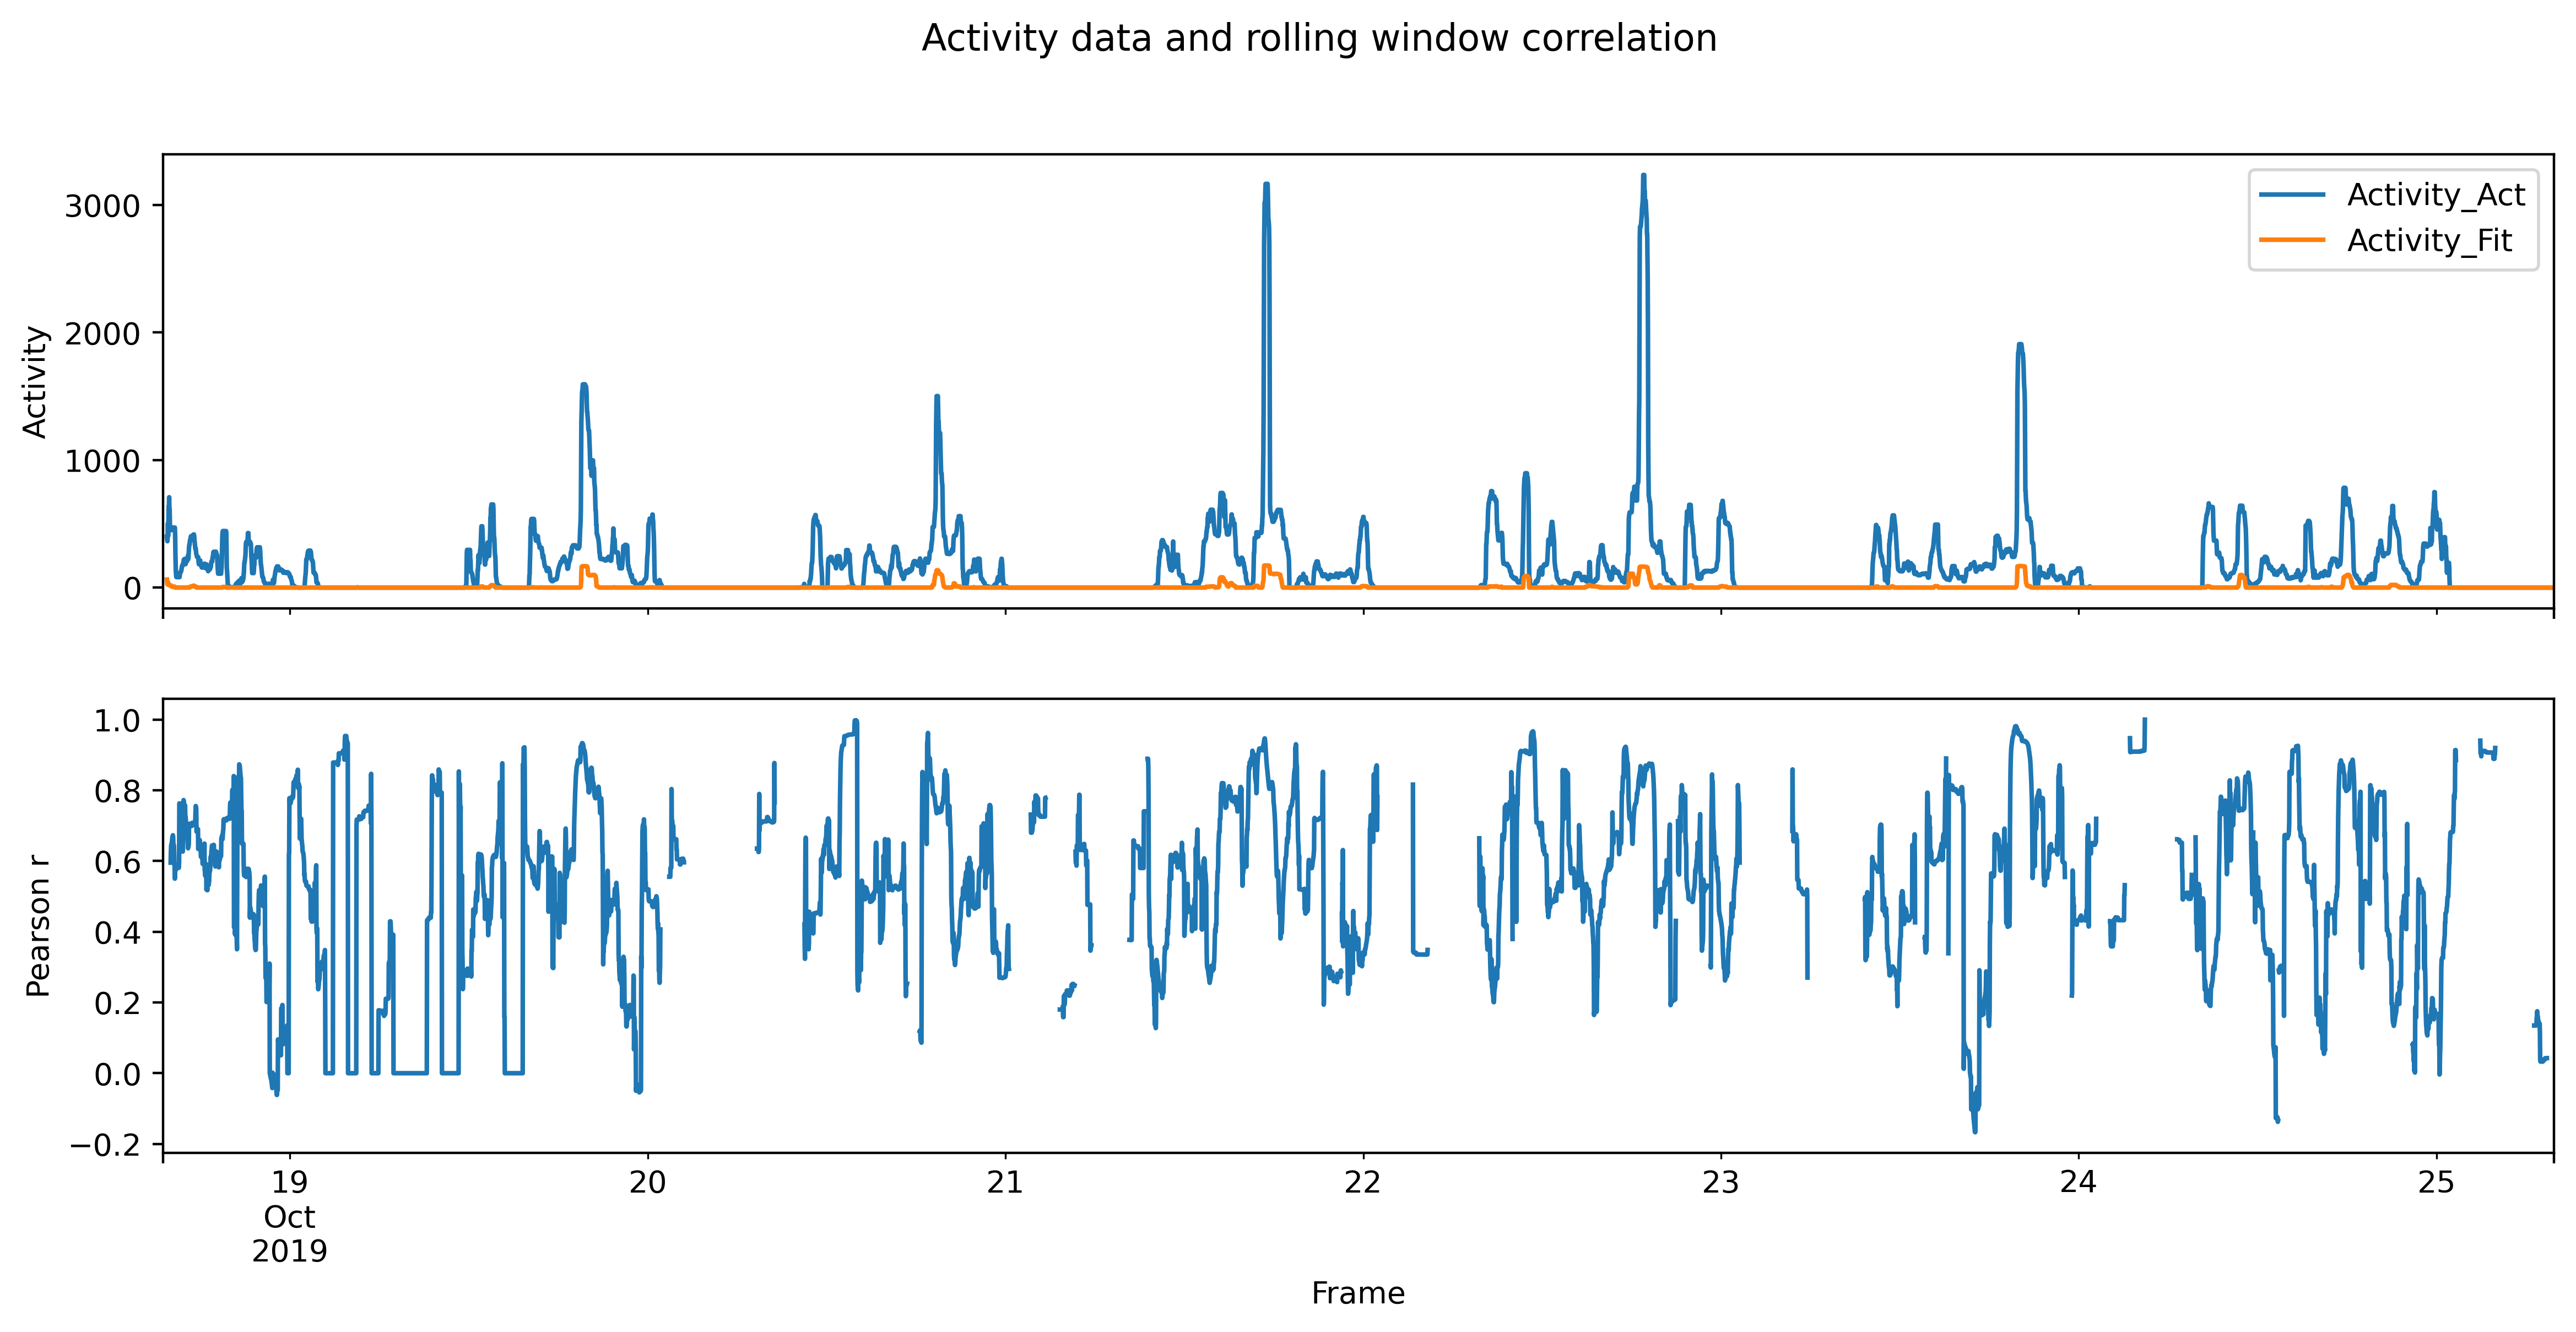

In [11]:
# Set window size to compute moving window synchrony.
r_window_size = 60
# Interpolate missing data.
df_interpolated = df.interpolate()
df_interpolated = df_interpolated
# Compute rolling window synchrony
rolling_r = df_interpolated['Activity_Act'].rolling(window=r_window_size, center=True).corr(df_interpolated['Activity_Fit'])
f,ax=plt.subplots(2,1,figsize=(14,6), dpi=400, sharex=True)
df.rolling(window=30,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Frame',ylabel='Activity')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Frame',ylabel='Pearson r')
plt.suptitle("Activity data and rolling window correlation")


In [12]:
rolling_r

Time
2019-10-18 15:30:00   NaN
2019-10-18 15:31:00   NaN
2019-10-18 15:32:00   NaN
2019-10-18 15:33:00   NaN
2019-10-18 15:34:00   NaN
                       ..
2019-10-25 07:49:00   NaN
2019-10-25 07:50:00   NaN
2019-10-25 07:51:00   NaN
2019-10-25 07:52:00   NaN
2019-10-25 07:53:00   NaN
Length: 9624, dtype: float64

Not great!

## At what times of day are correlation values low?

In [13]:
df_interpolated[df_interpolated.index.isin(rolling_r[rolling_r < 0.5].index)]

,Activity_Act,Activity_Fit
Time,,
2019-10-18 20:15:00,0.0,0
2019-10-18 20:16:00,261.0,4
2019-10-18 20:17:00,143.0,0
2019-10-18 20:18:00,0.0,0
2019-10-18 20:19:00,28.0,0
...,...,...
2019-10-25 07:20:00,0.0,0
2019-10-25 07:21:00,55.0,0
2019-10-25 07:22:00,0.0,0


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Text(0, 0.5, 'Number of Minutes')

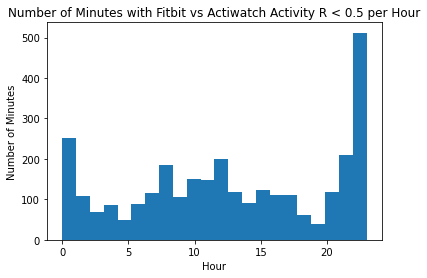

In [14]:
import datetime as dt

df_lowr = df_interpolated[df_interpolated.index.isin(rolling_r[rolling_r < 0.5].index)]
df_lowr['Time'] = pd.to_datetime(df_lowr.index)
df_lowr['times'] = df_lowr['Time'].dt.hour
#df_lowr.groupby(df_lowr['times']).sum()
fig, ax = plt.subplots()
ax.hist(df_lowr['times'], bins=22)
plt.title("Number of Minutes with Fitbit vs Actiwatch Activity R < 0.5 per Hour")
ax.set_xlabel('Hour')
ax.set_ylabel('Number of Minutes')

Fitbit and Actiwatch have low correlation values around 23:00-01:00 for this participant.

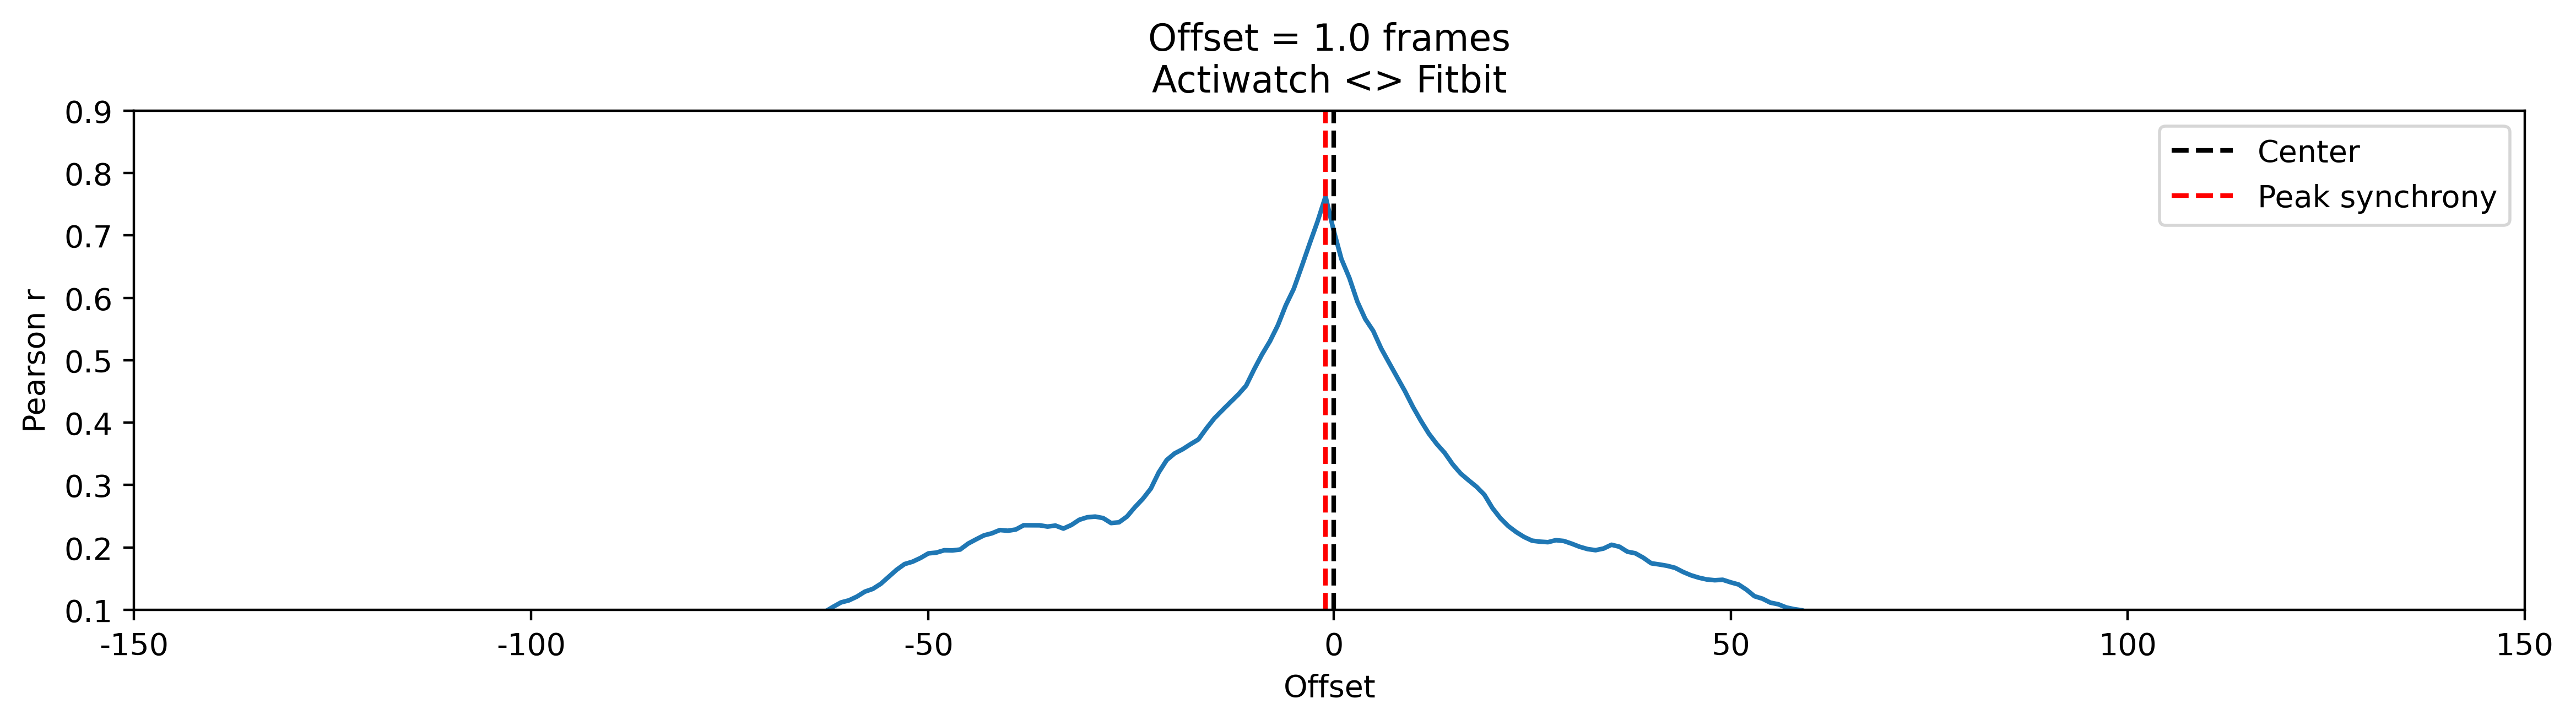

In [15]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

d1 = df['Activity_Act']
d2 = df['Activity_Fit']
minutes = 5
fpm = 30
rs = [crosscorr(d1,d2, lag) for lag in range(-int(minutes*fpm),int(minutes*fpm+1))]
offset = np.ceil(len(rs)/2)-np.argmax(rs)

f,ax=plt.subplots(figsize=(14,3), dpi=400)
ax.plot(rs)
ax.axvline(np.ceil(len(rs)/2),color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Offset = {offset} frames\nActiwatch <> Fitbit',ylim=[.1,.9],xlim=[90,211], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);
plt.legend()

In the plot above, we can infer from the negative offset that Actiwatch is leading the interaction (correlation is maximized when Fitbit is pulled forward by 1 frames).

In [16]:
dfn = df.reset_index()
dfn

,Time,Activity_Act,Activity_Fit
0,2019-10-18 15:30:00,335.0,105
1,2019-10-18 15:31:00,478.0,90
2,2019-10-18 15:32:00,77.0,13
3,2019-10-18 15:33:00,109.0,0
4,2019-10-18 15:34:00,613.0,80
...,...,...,...
9619,2019-10-25 07:49:00,0.0,0
9620,2019-10-25 07:50:00,0.0,0
9621,2019-10-25 07:51:00,0.0,0
9622,2019-10-25 07:52:00,0.0,0


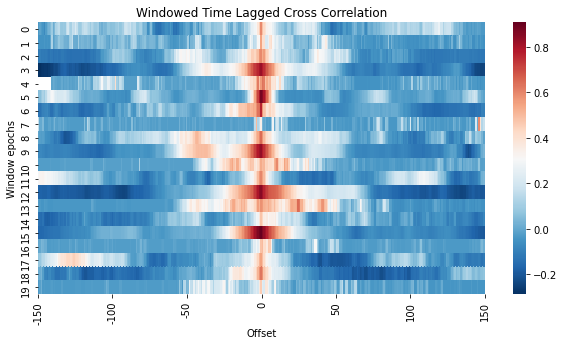

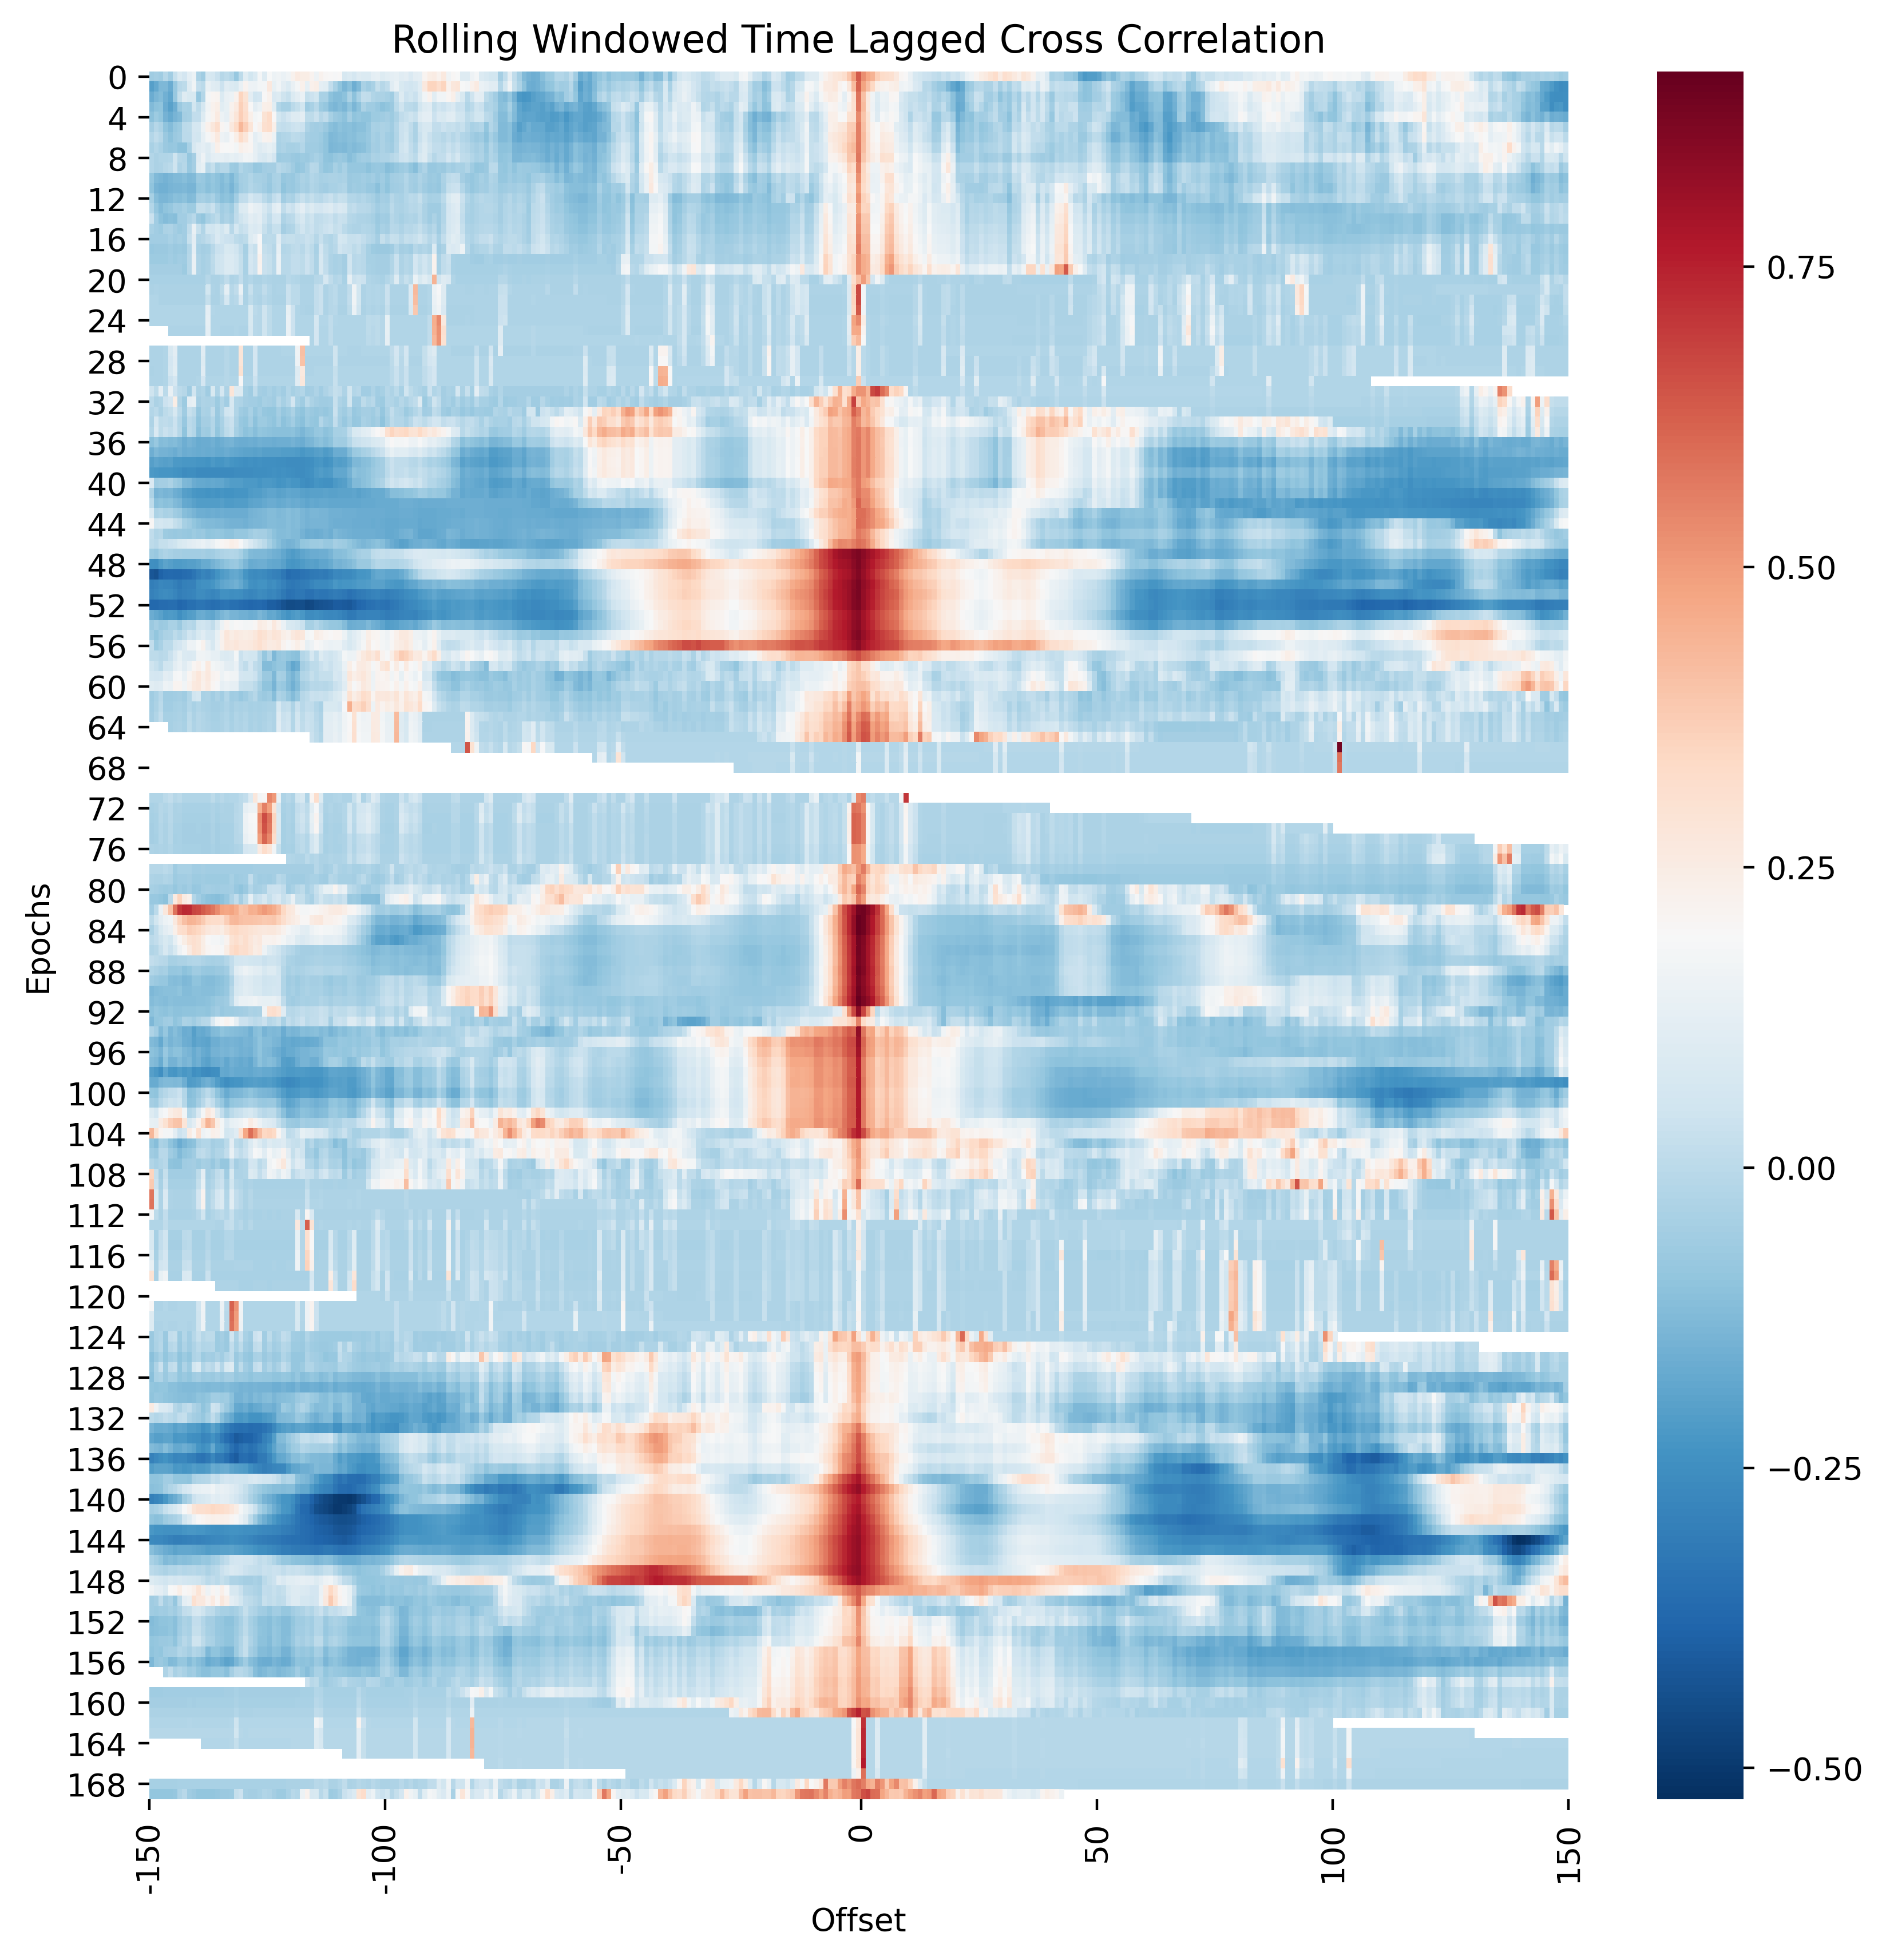

In [17]:
# Windowed time lagged cross correlation
minutes = 5
fpm = 30
no_splits = 20
samples_per_split = df.shape[0]/no_splits
rss=[]
dfn = df.reset_index()

for t in range(0, no_splits):
    d1 = dfn['Activity_Act'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    d2 = dfn['Activity_Fit'].loc[(t)*samples_per_split:(t+1)*samples_per_split]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(minutes*fpm),int(minutes*fpm+1))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Window epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

# Rolling window time lagged cross correlation
minutes = 5
fpm = 30
window_size = 300 #samples
t_start = 0
t_end = t_start + window_size
step_size = 30
rss=[]
while t_end < 5400:
    d1 = dfn['Activity_Act'].iloc[t_start:t_end]
    d2 = dfn['Activity_Fit'].iloc[t_start:t_end]
    rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(minutes*fpm),int(minutes*fpm+1))]
    rss.append(rs)
    t_start = t_start + step_size
    t_end = t_end + step_size
rss = pd.DataFrame(rss)

f,ax = plt.subplots(figsize=(10,10), dpi=400)
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

At offset close to 0, seeing high correlation across many of the epochs, with some epochs with lower correlation values regardless of offset, meaning there are periods with low correlation between the two devices' activity data.

Code to shift time series data: [Andres Araujo](https://stackoverflow.com/questions/33171413/cross-correlation-time-lag-correlation-with-pandas)

In [18]:
def df_shifted(df, target=None, lag=0):
    if not lag and not target:
        return df       
    new = {}
    for c in df.columns:
        if c == target:
            new[c] = df[target]
        else:
            new[c] = df[c].shift(periods=lag)
    return  pd.DataFrame(data=new)

In [19]:
print("Offset is %s frames" % offset)
if offset > 1:
    df_new = df_shifted(df, 'Activity_Act', lag = int(offset))

    overall_pearson_r_new = df_new.corr().iloc[0,1]
    print(f"Pandas computed Pearson r: {overall_pearson_r_new}")
    # out: Pandas computed Pearson r: 0.2058774513561943

    r_new, p_new = stats.pearsonr(df_new.dropna()['Activity_Act'], df_new.dropna()['Activity_Fit'])
    print(f"Scipy computed Pearson r: {r_new} and p-value: {p_new}")
    # out: Scipy comput
    
    f_new,ax_new=plt.subplots(figsize=(7,3))
    df_new.set_index('Time').rolling(window=30,center=True).median().plot(ax=ax)
    ax_new.set(xlabel='Time',ylabel='Pearson r')
    ax_new.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

Offset is 1.0 frames


In [20]:
r_window_size = 120
rolling_r = []
rdf = pd.DataFrame(columns = ['Time', 'R'])

for f in act_files:
    subject = str.split(f, "act_files/")[1][0:5]
    indices = [ff for ff, s in enumerate(fitbit_files) if subject in s] #what if there are multiple matching files?
    print(subject)
    print(indices)
    
    rs = []
    offset = []

    if not indices:
        print("subject %s no fitbit data available" % subject)
    else:
        print("merging %s with %s" % (os.path.basename(f), os.path.basename(fitbit_files[indices[0]])))
        
        header_offset = []

        with open(f, encoding='utf-8') as file:
                    for header_offset, line in enumerate(file, 1):
                        if 'Line' in line:
                            header_offset = header_offset
                            break

        act = pd.read_csv(f, skiprows=header_offset + 6)
        act['Time'] = pd.to_datetime(act['Date'] + ' ' + act['Time'])
        act = act.resample('1T', on='Time').sum()
        
        fit = pd.read_csv(fitbit_files[indices[0]])
        fit['Time'] = pd.to_datetime(fit['ActivityMinute'])
        fit['Activity'] = fit['Steps']

        df = pd.merge(act, fit, on = 'Time', suffixes = ('_Act', '_Fit'))
        df = df[['Time', 'Activity_Act', 'Activity_Fit']]
        
        rolling_r = df['Activity_Act'].rolling(window=r_window_size, center=True).corr(df['Activity_Fit'])
        rdf['Time'] = df['Time']
        rdf['R'] = rolling_r
        print(rdf)
        rdf.to_csv(home_dir + "/Box/CogNeuroLab/Wearables/data/correlation/" + subject + "_" + str(r_window_size) + "_window_rolling_r.txt")
        
#         df.set_index('Time')

#         d1 = df[['Time','Activity_Act']]
#         d2 = df[['Time','Activity_Fit']]
        
#         d1.to_csv(home_dir + "/Box/CogNeuroLab/Wearables/data/circadian_measures/raw/actiwatch/" + subject + "_act.txt", sep = " ", header = False, index = False)
#         d2.to_csv(home_dir + "/Box/CogNeuroLab/Wearables/data/circadian_measures/raw/fitbit/" + subject + "_fit.txt", sep = " ", header = False, index = False) 
    

10011
[0]
merging 10011_10_24_2019_4_30_00_PM_New_Analysis.csv with WA_10011_minuteStepsNarrow_20190901_20201020.csv
                     Time   R
0     2019-10-24 16:30:00 NaN
1     2019-10-24 16:31:00 NaN
2     2019-10-24 16:32:00 NaN
3     2019-10-24 16:33:00 NaN
4     2019-10-24 16:34:00 NaN
...                   ...  ..
20123 2019-11-07 15:53:00 NaN
20124 2019-11-07 15:54:00 NaN
20125 2019-11-07 15:55:00 NaN
20126 2019-11-07 15:56:00 NaN
20127 2019-11-07 15:57:00 NaN

[20128 rows x 2 columns]
10012
[1]
merging 10012_10_18_2019_3_30_00_PM_New_Analysis.csv with WA_10012_minuteStepsNarrow_20190901_20201020.csv
                     Time   R
0     2019-10-18 15:30:00 NaN
1     2019-10-18 15:31:00 NaN
2     2019-10-18 15:32:00 NaN
3     2019-10-18 15:33:00 NaN
4     2019-10-18 15:34:00 NaN
...                   ...  ..
20123                 NaT NaN
20124                 NaT NaN
20125                 NaT NaN
20126                 NaT NaN
20127                 NaT NaN

[20128 rows x 2 col

                     Time   R
0     2020-08-25 10:00:00 NaN
1     2020-08-25 10:01:00 NaN
2     2020-08-25 10:02:00 NaN
3     2020-08-25 10:03:00 NaN
4     2020-08-25 10:04:00 NaN
...                   ...  ..
20123                 NaT NaN
20124                 NaT NaN
20125                 NaT NaN
20126                 NaT NaN
20127                 NaT NaN

[20128 rows x 2 columns]
10145
[19]
merging 10145_8_27_2020_4_30_00_PM_New_Analysis.csv with WA_10145_minuteStepsNarrow_20190901_20201020.csv
                     Time   R
0     2020-08-27 16:30:00 NaN
1     2020-08-27 16:31:00 NaN
2     2020-08-27 16:32:00 NaN
3     2020-08-27 16:33:00 NaN
4     2020-08-27 16:34:00 NaN
...                   ...  ..
20123                 NaT NaN
20124                 NaT NaN
20125                 NaT NaN
20126                 NaT NaN
20127                 NaT NaN

[20128 rows x 2 columns]
10146
[20]
merging 10146_8_28_2020_10_22_00_AM_New_Analysis.csv with WA_10146_minuteStepsNarrow_20190901_202010

                     Time   R
0     2020-08-04 08:01:00 NaN
1     2020-08-04 08:02:00 NaN
2     2020-08-04 08:03:00 NaN
3     2020-08-04 08:04:00 NaN
4     2020-08-04 08:05:00 NaN
...                   ...  ..
20123                 NaT NaN
20124                 NaT NaN
20125                 NaT NaN
20126                 NaT NaN
20127                 NaT NaN

[20128 rows x 2 columns]
20129
[37]
merging 20129_8_4_2020_8_06_00_AM_New_Analysis.csv with WA_20129_minuteStepsNarrow_20190901_20201020.csv
      Time   R
0      NaT NaN
1      NaT NaN
2      NaT NaN
3      NaT NaN
4      NaT NaN
...    ...  ..
20123  NaT NaN
20124  NaT NaN
20125  NaT NaN
20126  NaT NaN
20127  NaT NaN

[20128 rows x 2 columns]
20131
[38]
merging 20131_8_12_2020_5_00_00_PM_New_Analysis.csv with WA_20131_minuteStepsNarrow_20190901_20201020.csv
                     Time   R
0     2020-08-12 17:00:00 NaN
1     2020-08-12 17:01:00 NaN
2     2020-08-12 17:02:00 NaN
3     2020-08-12 17:03:00 NaN
4     2020-08-12 17:04:00

In [21]:
subjects = []
for f in glob.glob(home_dir + "/Box/CogNeuroLab/Wearables/data/circadian_measures/raw/actiwatch/*_act.txt"):
    subjects.append(str.split(f, "actiwatch/")[1][0:5])

subjects   

dfcor = pd.DataFrame(columns = ['Time', 'R','Subject'])
a = pd.DataFrame()

for subject in subjects:
    a = pd.read_csv(home_dir + "/Box/CogNeuroLab/Wearables/data/correlation/" + subject + "_10_window_rolling_r.txt")
    a.loc[:,'Subject'] = subject
    dfcor = pd.concat((dfcor, a))

dfcor[0:5]

,Time,R,Subject,Unnamed: 0
0,2019-10-24 16:30:00,NaN,10011,0.0
1,2019-10-24 16:31:00,NaN,10011,1.0
2,2019-10-24 16:32:00,NaN,10011,2.0
3,2019-10-24 16:33:00,NaN,10011,3.0
4,2019-10-24 16:34:00,NaN,10011,4.0


In [22]:
import datetime as dt

dfcor['Time'] = pd.to_datetime(dfcor['Time'])
dfcor['Hour'] = dfcor['Time'].dt.hour
dfcor['Hour'] = dfcor['Hour'].astype(float)
dfm = dfcor.groupby(['Subject', 'Hour']).mean()['R']
dfm

Subject  Hour
10011    0.0     0.139213
         1.0     0.061152
         2.0     0.135681
         3.0     0.225732
         4.0     0.150240
                   ...   
20115    19.0    0.377630
         20.0    0.194753
         21.0    0.328070
         22.0    0.221494
         23.0    0.180645
Name: R, Length: 480, dtype: float64

In [23]:
dfm.groupby('Hour').mean()

Hour
0.0     0.281796
1.0     0.282439
2.0     0.283439
3.0     0.280574
4.0     0.230017
5.0     0.242924
6.0     0.293340
7.0     0.325577
8.0     0.332633
9.0     0.366684
10.0    0.390324
11.0    0.362339
12.0    0.393035
13.0    0.392728
14.0    0.366866
15.0    0.379989
16.0    0.389629
17.0    0.380125
18.0    0.364146
19.0    0.360860
20.0    0.355317
21.0    0.354799
22.0    0.363602
23.0    0.309182
Name: R, dtype: float64

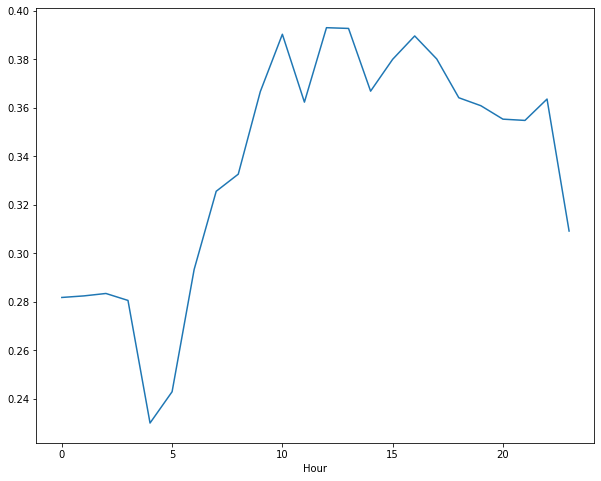

In [24]:
dfm.groupby('Hour').mean().plot(figsize = (10, 8))

In [25]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

cc = []
metrics = []
    
for f in act_files:
    subject = str.split(f, "act_files/")[1][0:5]
    indices = [ff for ff, s in enumerate(fitbit_files) if subject in s] #what if there are multiple matching files?
    print(subject)
    print(indices)
    
    rs = []
    offset = []

    if not indices:
        print("subject %s no fitbit data available" % subject)
    else:
        print("merging %s with %s" % (os.path.basename(f), os.path.basename(fitbit_files[indices[0]])))
        
        header_offset = []

        with open(f, encoding='utf-8') as file:
                    for header_offset, line in enumerate(file, 1):
                        if 'Line' in line:
                            header_offset = header_offset
                            break

        act = pd.read_csv(f, skiprows=header_offset + 6)
        act['Time'] = pd.to_datetime(act['Date'] + ' ' + act['Time'])
        act = act.resample('T', on='Time').sum()
        
        fit = pd.read_csv(fitbit_files[indices[0]])
        fit['Time'] = pd.to_datetime(fit['ActivityMinute'])
        fit['Activity'] = fit['Steps']

        df = pd.merge(act, fit, on = 'Time', suffixes = ('_Act', '_Fit'))
        df = df[['Time', 'Activity_Act', 'Activity_Fit']]
        df.set_index('Time')

        d1 = df['Activity_Act']
        d2 = df['Activity_Fit']
        minutes = 5
        fpm = 30
        rs = [crosscorr(d1,d2, lag) for lag in range(-int(minutes*fpm),int(minutes*fpm+1))]
        offset = np.ceil(len(rs)/2)-np.argmax(rs)
        
        cc.append([subject, max(rs), offset])

10011
[0]
merging 10011_10_24_2019_4_30_00_PM_New_Analysis.csv with WA_10011_minuteStepsNarrow_20190901_20201020.csv
10012
[1]
merging 10012_10_18_2019_3_30_00_PM_New_Analysis.csv with WA_10012_minuteStepsNarrow_20190901_20201020.csv
10014
[2]
merging 10014_11_11_2019_5_20_00_PM_New_Analysis.csv with WA_10014_minuteStepsNarrow_20190901_20201020.csv
10016
[3]
merging 10016_1_24_2020_11_45_00_AM_New_Analysis.csv with WA_10016_minuteStepsNarrow_20190901_20201020.csv
10023
[4]
merging 10023_11_11_2019_1_50_00_PM_New_Analysis.csv with WA_10023_minuteStepsNarrow_20190901_20201020.csv
10024
[5]
merging 10024_11_5_2019_3_15_00_PM_New_Analysis.csv with WA_10024_minuteStepsNarrow_20190901_20201020.csv
10025
[6]
merging 10025_12_5_2019_2_15_00_PM_New_Analysis.csv with WA_10025_minuteStepsNarrow_20190901_20201020.csv
10033
[7]
merging 10033_11_7_2019_2_50_00_PM_New_Analysis.csv with WA_10033_minuteStepsNarrow_20190901_20201020.csv
10035
[8]
merging 10035_2_7_2020_2_45_00_PM_New_Analysis.csv with W

In [26]:
cc_df = pd.DataFrame(cc, columns = ['subject', 'cross_cor', 'offset'])
cc_df.to_csv(home_dir + "/Box/CogNeuroLab/Wearables/data/crosscor.csv")
cc_df[0:5]

,subject,cross_cor,offset
0,10011,0.463774,1.0
1,10012,0.762435,1.0
2,10014,0.596735,1.0
3,10016,0.750365,1.0
4,10023,0.650556,1.0


Text(0, 0.5, 'Mean Cross-Correlation')

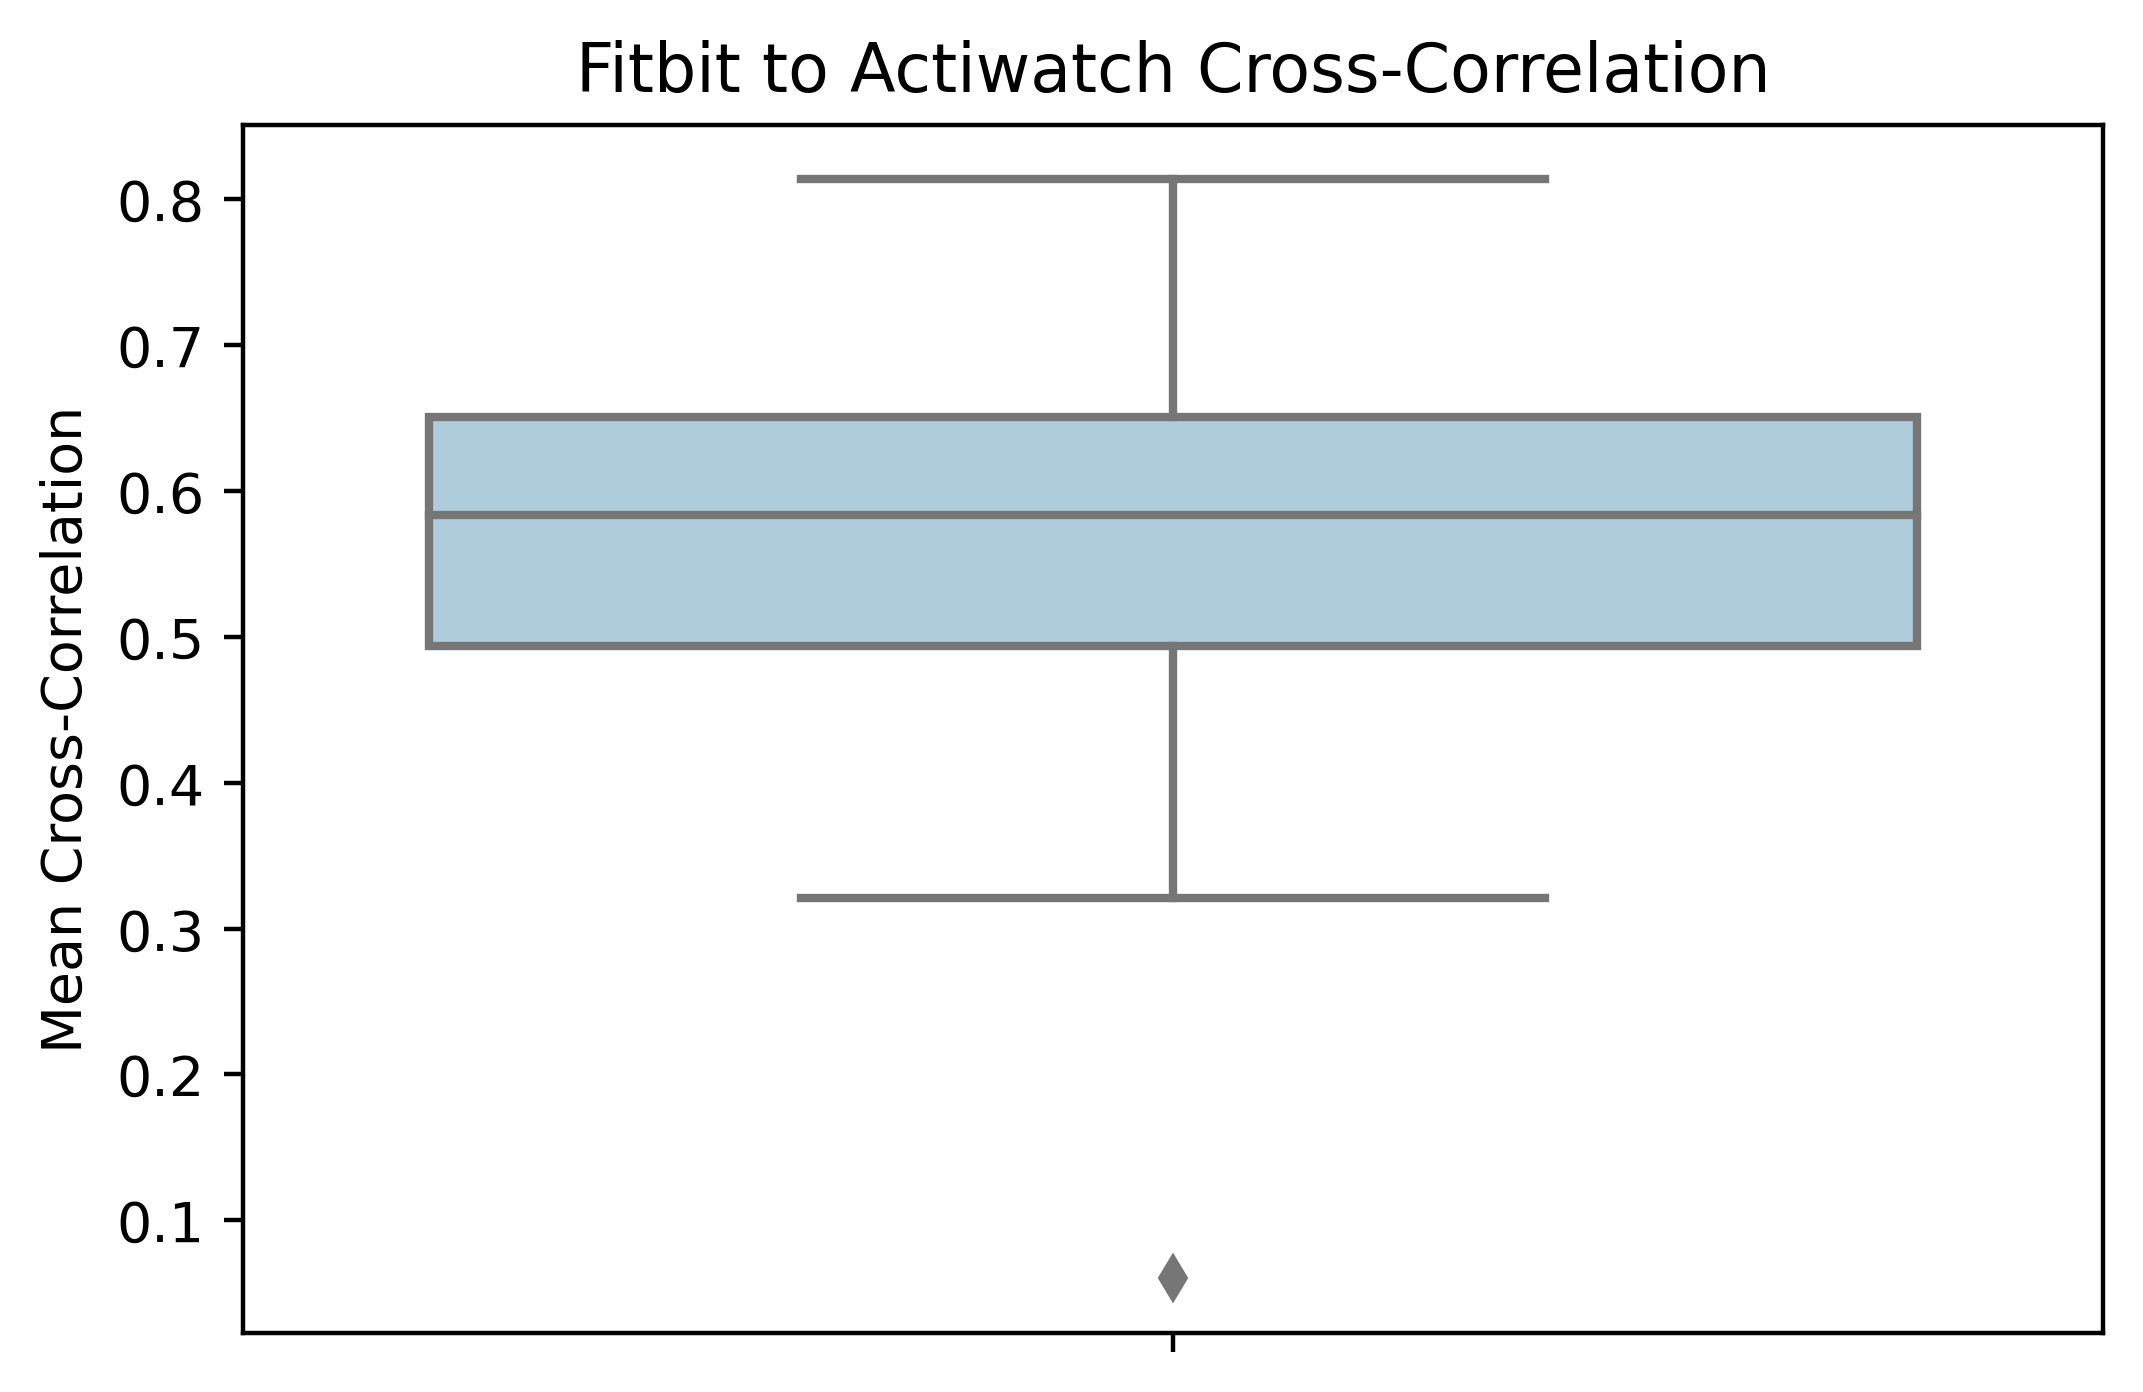

In [27]:
sns.set_palette(sns.color_palette('Paired'))
fig, axes = plt.subplots(dpi=400)
sns.boxplot(y = cc_df['cross_cor'], ax = axes)
axes.set_title('Fitbit to Actiwatch Cross-Correlation')
axes.set_xlabel('')
axes.set_ylabel('Mean Cross-Correlation')


** Future ** 
1. Sleep stages (Where is this info for actiwatch? For fitbit, read in the sleep file)
2. Add metrics (sleep efficiency, onset latency, rest-activity measures, etc.)
3. Group comparisons between young and old

In [28]:
#total slep time

 # problem with fitbit on this subject?

In [263]:
df = pd.read_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/WearableAssessment-Validation_DATA_2020-11-06_1500.csv')
df = df.ffill()
df = df[df['redcap_event_name'].str.contains("session_1_arm_1")]
df['subject'] = np.where(df['age_group'] == 1.0, 
                         '1' + df['record_id'].astype(str).str.pad(4,fillchar='0'), 
                         '2' + df['record_id'].astype(str).str.pad(4,fillchar='0'))
df.set_index('subject')

,record_id,redcap_event_name,age_group,selected_devices___1,selected_devices___2,selected_devices___3,handedness,gender,ethnicity___1,ethnicity___2,...,sleep_latency_raw,component_two,component_three,sleep_efficiency,component_four,sleep_disruption_raw,component_five,component_six,sleep_dysfunction_raw,component_seven
subject,,,,,,,,,,,,,,,,,,,,,
10011,11,session_1_arm_1,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.976744,0.0,3.0,1.0,0.0,0.0,0.0
10012,12,session_1_arm_1,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,1.000000,0.0,8.0,1.0,0.0,0.0,0.0
10014,14,session_1_arm_1,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,...,1.0,1.0,1.0,0.796460,1.0,6.0,1.0,0.0,1.0,1.0
10016,16,session_1_arm_1,1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,...,3.0,2.0,0.0,0.875000,0.0,5.0,1.0,0.0,1.0,1.0
10023,23,session_1_arm_1,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,...,1.0,1.0,2.0,0.964630,0.0,3.0,1.0,0.0,2.0,1.0
10024,24,session_1_arm_1,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,...,2.0,1.0,0.0,0.941176,0.0,4.0,1.0,0.0,0.0,0.0
10025,25,session_1_arm_1,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0
10033,33,session_1_arm_1,1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,...,1.0,1.0,0.0,0.937500,0.0,11.0,2.0,0.0,0.0,0.0
10035,35,session_1_arm_1,1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,...,2.0,1.0,0.0,0.937500,0.0,3.0,1.0,0.0,3.0,2.0


In [266]:
fb_sleep_files = glob.glob(home_dir + "/Box/CogNeuroLab/Wearables/data/fitbit/*sleepDay*", recursive=True)
tst_cor = []
tst_df = []

for f in act_files:
    subject = str.split(f, "act_files/")[1][0:5]
    indices = [ff for ff, s in enumerate(fb_sleep_files) if subject in s] #what if there are multiple matching files?
    print(subject)
    print(indices)
    
    rs = []
    offset = []

    if not indices:
        print("subject %s no fitbit data available" % subject)
    else:
        print("merging %s with %s" % (os.path.basename(f), os.path.basename(fb_sleep_files[indices[0]])))
        
        header_offset = []
        footer_offset = []
        rpx = []

        with open(f, encoding='utf-8') as file:
                    for header_offset, line in enumerate(file, 1):
                        if 'Statistics' in line:
                            header_offset = header_offset
                            break

        with open(f, encoding='utf-8') as file:
                    for footer_offset, line in enumerate(file, 1):
                        if 'Line' in line:
                            footer_offset = footer_offset +6
                            break

        subject = str.split(f, "act_files/")[1][0:5]


        rpx_metrics = pd.read_csv(f, skiprows=header_offset, nrows=footer_offset-header_offset, engine='python')
        rpx_metrics = rpx_metrics[rpx_metrics['Interval Type'] == 'SLEEP']
        rpx_metrics['Sleep Time'] = rpx_metrics['Sleep Time'].astype(float)
        rpx_metrics['Start Date'] = pd.to_datetime(rpx_metrics['Start Date'])
    
        fb_sleep = pd.read_csv(fb_sleep_files[indices[0]], engine='python')
        fb_sleep['Start Date'] = pd.to_datetime(fb_sleep['SleepDay'])
        fb_sleep['Sleep Efficiency'] = (fb_sleep['TotalMinutesAsleep']/fb_sleep['TotalTimeInBed'])*100
        
        tst_df = pd.merge(rpx_metrics, fb_sleep, on = 'Start Date') # but are the start dates the same?
        tst_df['Efficiency'] = tst_df['Efficiency'].apply(pd.to_numeric)
        
        try:
            # compute correlation r value using each day's tst or se values from each device
            tst_r = np.corrcoef(tst_df['Sleep Time'], tst_df['TotalMinutesAsleep'])[0,1]
            se_r = np.corrcoef(tst_df['Efficiency'], tst_df['Sleep Efficiency'])[0,1]
            
            # compute mean tst and se from each device
            tst_mean_act = np.mean(tst_df['Sleep Time'])
            tst_mean_fit = np.mean(tst_df['TotalMinutesAsleep'])
            
            se_mean_act = np.nanmean(tst_df['Efficiency'].astype(float))
            se_mean_fit = np.nanmean(tst_df['Sleep Efficiency'])
            
            # append everything into a single dataset
            tst_cor.append([subject, tst_r, se_r, tst_mean_act, tst_mean_fit, se_mean_act, se_mean_fit])
        except:
            'NA'

tst_cor = pd.DataFrame(tst_cor, columns = ['subject', 'tst_r', 'se_r', 'tst_mean_act', 'tst_mean_fit', 'se_mean_act', 'se_mean_fit'])


10011
[0]
merging 10011_10_24_2019_4_30_00_PM_New_Analysis.csv with WA_10011_sleepDay_20190901_20201020.csv
10012
[1]
merging 10012_10_18_2019_3_30_00_PM_New_Analysis.csv with WA_10012_sleepDay_20190901_20201020.csv
10014
[2]
merging 10014_11_11_2019_5_20_00_PM_New_Analysis.csv with WA_10014_sleepDay_20190901_20201020.csv
10016
[3]
merging 10016_1_24_2020_11_45_00_AM_New_Analysis.csv with WA_10016_sleepDay_20190901_20201020.csv
10023
[4]
merging 10023_11_11_2019_1_50_00_PM_New_Analysis.csv with WA_10023_sleepDay_20190901_20201020.csv
10024
[5]
merging 10024_11_5_2019_3_15_00_PM_New_Analysis.csv with WA_10024_sleepDay_20190901_20201020.csv
10025
[6]
merging 10025_12_5_2019_2_15_00_PM_New_Analysis.csv with WA_10025_sleepDay_20190901_20201020.csv
10033
[7]
merging 10033_11_7_2019_2_50_00_PM_New_Analysis.csv with WA_10033_sleepDay_20190901_20201020.csv
10035
[8]
merging 10035_2_7_2020_2_45_00_PM_New_Analysis.csv with WA_10035_sleepDay_20190901_20201020.csv
10038
[9]
merging 10038_1_22_2020

/usr/local/lib/python3.7/site-packages/numpy/lib/function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)


10140
[16]
merging 10140_8_25_2020_10_37_00_AM_New_Analysis.csv with WA_10140_sleepDay_20190901_20201020.csv
10143
[17]
merging 10143_8_27_2020_5_00_00_PM_New_Analysis.csv with WA_10143_sleepDay_20190901_20201020.csv
10144
[18]
merging 10144_8_25_2020_10_00_00_AM_New_Analysis.csv with WA_10144_sleepDay_20190901_20201020.csv
10145
[19]
merging 10145_8_27_2020_4_30_00_PM_New_Analysis.csv with WA_10145_sleepDay_20190901_20201020.csv
10146
[20]
merging 10146_8_28_2020_10_22_00_AM_New_Analysis.csv with WA_10146_sleepDay_20190901_20201020.csv
10147
[21]
merging 10147_9_10_2020_9_00_00_AM_New_Analysis.csv with WA_10147_sleepDay_20190901_20201020.csv
10148
[22]
merging 10148_9_10_2020_9_00_00_AM_New_Analysis.csv with WA_10148_sleepDay_20190901_20201020.csv
10149
[23]
merging 10149_8_28_2020_4_00_00_PM_New_Analysis.csv with WA_10149_sleepDay_20190901_20201020.csv
10150
[24]
merging 10150_9_18_2020_12_30_00_PM_New_Analysis.csv with WA_10150_sleepDay_20190901_20201020.csv
20076
[]
subject 20076 n

## Single subject

[Text(0, 0.5, 'Sleep Time (min)'), [], Text(0.5, 0, 'Day')]

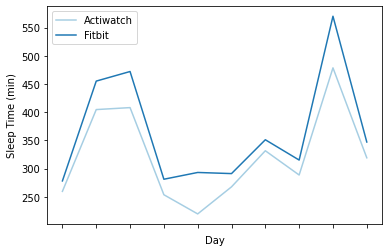

In [267]:
import seaborn as sns

sns.lineplot(x = 'Start Date', y = 'Sleep Time', data = tst_df, label = 'Actiwatch')
sns.lineplot(x = 'Start Date', y = 'TotalMinutesAsleep', data = tst_df, label = 'Fitbit').set(xticklabels=[], xlabel='Day', ylabel='Sleep Time (min)')


[Text(0, 0.5, 'Sleep Efficiency (%)'), [], Text(0.5, 0, 'Day')]

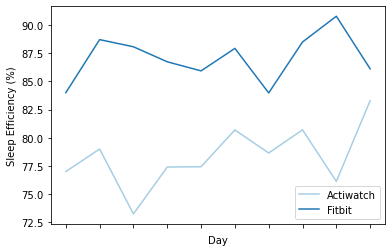

In [268]:
import seaborn as sns

sns.lineplot(x = 'Start Date', y = 'Efficiency', data = tst_df, label = 'Actiwatch')
sns.lineplot(x = 'Start Date', y = 'Sleep Efficiency', data = tst_df, label = 'Fitbit').set(xticklabels=[], xlabel='Day', ylabel='Sleep Efficiency (%)')



In [269]:
tst_cor

,subject,tst_r,se_r,tst_mean_act,tst_mean_fit,se_mean_act,se_mean_fit
0,10011,0.437126,0.433361,404.750000,452.750000,87.060000,91.035512
1,10012,0.557790,0.155540,460.625000,468.750000,82.428750,92.149857
2,10014,-0.240016,0.189342,463.375000,398.250000,86.001250,96.032846
3,10016,0.515045,-0.664897,364.944444,406.444444,78.851111,91.502603
4,10023,0.010588,-0.710575,352.000000,334.090909,78.760000,88.854236
5,10024,0.886187,0.494641,374.035714,426.071429,83.332143,93.872455
6,10025,0.896163,0.515033,402.678571,446.428571,82.381429,93.578199
7,10033,-0.190984,-0.137408,475.384615,509.230769,80.207692,93.175467
8,10035,0.811984,0.538831,404.000000,422.142857,86.089286,91.208602
9,10038,0.537524,-0.007142,362.107143,406.571429,83.751429,94.761649


Need to get Fitbit Charge vs. Fitbit Inspire

In [270]:
df.columns

Index(['record_id', 'redcap_event_name', 'age_group', 'selected_devices___1',
       'selected_devices___2', 'selected_devices___3', 'handedness', 'gender',
       'ethnicity___1', 'ethnicity___2', 'ethnicity___3', 'ethnicity___4',
       'ethnicity___5', 'ethnicity___6', 'global_psqi', 'actiwatch_arm',
       'bed_time', 'fall_asleep', 'wake_time', 'hours_bed', 'hours_slept',
       'tr_sleep_30', 'tr_wakeup', 'tr_use_bathroom', 'tr_breathing',
       'tr_snoring', 'tr_too_cold', 'tr_too_hot', 'tr_dreams', 'tr_pain',
       'other_sleep', 'other_explain', 'sleep_medication',
       'trouble_staying_awake', 'sleep_enthusiasm', 'sleep_quality',
       'component_one', 'fall_asleep_raw', 'sleep_latency_raw',
       'component_two', 'component_three', 'sleep_efficiency',
       'component_four', 'sleep_disruption_raw', 'component_five',
       'component_six', 'sleep_dysfunction_raw', 'component_seven', 'subject',
       'fitbit'],
      dtype='object')

In [271]:
conditions = [
    (df['selected_devices___1'] == 0.0) & (df['selected_devices___2'] == 0.0),
    (df['selected_devices___1'] == 1.0) & (df['selected_devices___2'] == 1.0),
    (df['selected_devices___1'] == 1.0) & (df['selected_devices___3'] == 1.0)
    ]

# create a list of the values we want to assign for each condition
values = ['Fitbit Charge 2 HR', 'Fitbit Charge 2 HR', 'Fitbit Inspire HR']

# create a new column and use np.select to assign values to it using our lists as arguments
df['fitbit'] = np.select(conditions, values)


tst_cor['subject'] = tst_cor['subject'].astype(int)
tst_cor.set_index('subject')
df.set_index('subject')

,record_id,redcap_event_name,age_group,selected_devices___1,selected_devices___2,selected_devices___3,handedness,gender,ethnicity___1,ethnicity___2,...,component_two,component_three,sleep_efficiency,component_four,sleep_disruption_raw,component_five,component_six,sleep_dysfunction_raw,component_seven,fitbit
subject,,,,,,,,,,,,,,,,,,,,,
10011,11,session_1_arm_1,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,...,0.0,0.0,0.976744,0.0,3.0,1.0,0.0,0.0,0.0,Fitbit Charge 2 HR
10012,12,session_1_arm_1,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,...,0.0,0.0,1.000000,0.0,8.0,1.0,0.0,0.0,0.0,Fitbit Charge 2 HR
10014,14,session_1_arm_1,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,...,1.0,1.0,0.796460,1.0,6.0,1.0,0.0,1.0,1.0,Fitbit Charge 2 HR
10016,16,session_1_arm_1,1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,...,2.0,0.0,0.875000,0.0,5.0,1.0,0.0,1.0,1.0,Fitbit Charge 2 HR
10023,23,session_1_arm_1,1.0,0.0,0.0,0.0,2.0,1.0,0.0,1.0,...,1.0,2.0,0.964630,0.0,3.0,1.0,0.0,2.0,1.0,Fitbit Charge 2 HR
10024,24,session_1_arm_1,1.0,0.0,0.0,0.0,2.0,2.0,0.0,0.0,...,1.0,0.0,0.941176,0.0,4.0,1.0,0.0,0.0,0.0,Fitbit Charge 2 HR
10025,25,session_1_arm_1,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,...,1.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,Fitbit Charge 2 HR
10033,33,session_1_arm_1,1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,...,1.0,0.0,0.937500,0.0,11.0,2.0,0.0,0.0,0.0,Fitbit Charge 2 HR
10035,35,session_1_arm_1,1.0,0.0,0.0,0.0,2.0,2.0,0.0,1.0,...,1.0,0.0,0.937500,0.0,3.0,1.0,0.0,3.0,2.0,Fitbit Charge 2 HR


In [281]:
df1 = tst_cor.merge(df, on = 'subject')

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [273]:
df1.set_index('subject')

,tst_r,se_r,tst_mean_act,tst_mean_fit,se_mean_act,se_mean_fit,record_id,redcap_event_name,age_group,handedness,...,component_two,component_three,sleep_efficiency,component_four,sleep_disruption_raw,component_five,component_six,sleep_dysfunction_raw,component_seven,fitbit
subject,,,,,,,,,,,,,,,,,,,,,
10011,0.437126,0.433361,404.750000,452.750000,87.060000,91.035512,11,session_1_arm_1,1.0,2.0,...,0.0,0.0,0.976744,0.0,3.0,1.0,0.0,0.0,0.0,Fitbit Charge 2 HR
10012,0.557790,0.155540,460.625000,468.750000,82.428750,92.149857,12,session_1_arm_1,1.0,1.0,...,0.0,0.0,1.000000,0.0,8.0,1.0,0.0,0.0,0.0,Fitbit Charge 2 HR
10014,-0.240016,0.189342,463.375000,398.250000,86.001250,96.032846,14,session_1_arm_1,1.0,2.0,...,1.0,1.0,0.796460,1.0,6.0,1.0,0.0,1.0,1.0,Fitbit Charge 2 HR
10016,0.515045,-0.664897,364.944444,406.444444,78.851111,91.502603,16,session_1_arm_1,1.0,2.0,...,2.0,0.0,0.875000,0.0,5.0,1.0,0.0,1.0,1.0,Fitbit Charge 2 HR
10023,0.010588,-0.710575,352.000000,334.090909,78.760000,88.854236,23,session_1_arm_1,1.0,2.0,...,1.0,2.0,0.964630,0.0,3.0,1.0,0.0,2.0,1.0,Fitbit Charge 2 HR
10024,0.886187,0.494641,374.035714,426.071429,83.332143,93.872455,24,session_1_arm_1,1.0,2.0,...,1.0,0.0,0.941176,0.0,4.0,1.0,0.0,0.0,0.0,Fitbit Charge 2 HR
10025,0.896163,0.515033,402.678571,446.428571,82.381429,93.578199,25,session_1_arm_1,1.0,2.0,...,1.0,0.0,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,Fitbit Charge 2 HR
10033,-0.190984,-0.137408,475.384615,509.230769,80.207692,93.175467,33,session_1_arm_1,1.0,2.0,...,1.0,0.0,0.937500,0.0,11.0,2.0,0.0,0.0,0.0,Fitbit Charge 2 HR
10035,0.811984,0.538831,404.000000,422.142857,86.089286,91.208602,35,session_1_arm_1,1.0,2.0,...,1.0,0.0,0.937500,0.0,3.0,1.0,0.0,3.0,2.0,Fitbit Charge 2 HR


In [274]:
df1.to_csv('/Users/megmcmahon/Box/CogNeuroLab/Wearables/data/sleeptime_efficiency_device.csv')


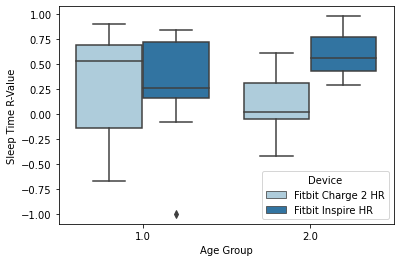

In [275]:
sns.boxplot(x = 'age_group', y = 'tst_r', hue = 'fitbit', data = df1).set(xlabel = 'Age Group', ylabel = 'Sleep Time R-Value')
plt.legend(title='Device')


1.0 is Young Adults, 2.0 is Older Adults

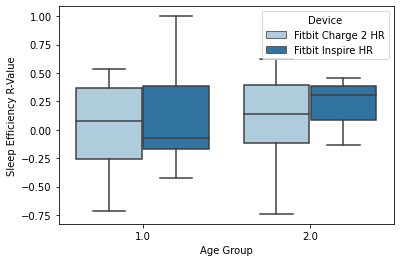

In [276]:
sns.boxplot(x = 'age_group', y = 'se_r', hue = 'fitbit', data = df1).set(xlabel = 'Age Group', ylabel = 'Sleep Efficiency R-Value')
plt.legend(title='Device')


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


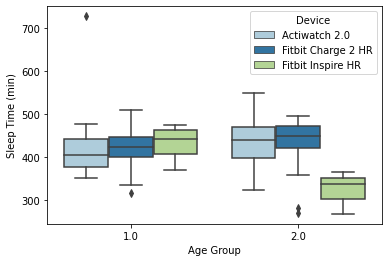

In [277]:
dfmelt = pd.melt(df1, id_vars=['subject', 'fitbit', 'age_group'], value_vars=['tst_mean_act', 'tst_mean_fit'])
dfmelt['fitbit'][dfmelt['variable'] == 'tst_mean_act'] = 'Actiwatch 2.0'
ax = sns.boxplot(x = 'age_group', y = 'value', hue = 'fitbit', data = dfmelt).set(ylabel = 'Sleep Time (min)', xlabel = 'Age Group')
plt.legend(title='Device')


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


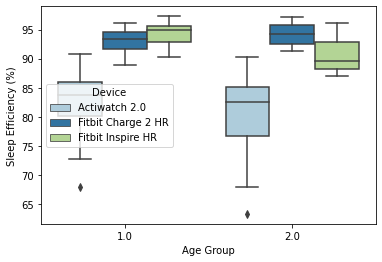

In [278]:
dfmelt = pd.melt(df1, id_vars=['subject', 'fitbit', 'age_group'], value_vars=['se_mean_act', 'se_mean_fit'])
dfmelt['fitbit'][dfmelt['variable'] == 'se_mean_act'] = 'Actiwatch 2.0'
sns.boxplot(x = 'age_group', y = 'value', hue = 'fitbit', data = dfmelt).set(ylabel = 'Sleep Efficiency (%)', xlabel = 'Age Group')
plt.legend(title='Device')



In [279]:
df1.groupby(['age_group', 'fitbit']).count()

subject  tst_r  se_r  tst_mean_act  \
age_group fitbit                                                   
1.0       Fitbit Charge 2 HR       14     14    14            14   
          Fitbit Inspire HR         9      9     9             9   
2.0       Fitbit Charge 2 HR       12     12    12            12   
          Fitbit Inspire HR         3      3     3             3   

                              tst_mean_fit  se_mean_act  se_mean_fit  \
age_group fitbit                                                       
1.0       Fitbit Charge 2 HR            14           14           14   
          Fitbit Inspire HR              9            9            9   
2.0       Fitbit Charge 2 HR            12           12           12   
          Fitbit Inspire HR              3            3            3   

                              record_id  redcap_event_name  handedness  ...  \
age_group fitbit                                                        ...   
1.0       Fitbit Charge 2 HR         14                 14          14  ...   
          Fitbit Inspire HR           9                  9           9  ...   
2.0       Fitbit Charge 2 HR         12                 12          12  ...   
          Fitbit Inspire HR           3                  3           3  ...   

                              sleep_latency_raw  component_two  \
age_group fitbit                                                 
1.0       Fitbit Charge 2 HR                 14             14   
          Fitbit Inspire HR                   9              9   
2.0       Fitbit Charge 2 HR                 12             12   
          Fitbit Inspire HR                   3              3   

                              component_three  sleep_efficiency  \
age_group fitbit                                                  
1.0       Fitbit Charge 2 HR               14                14   
          Fitbit Inspire HR                 9                 9   
2.0       Fitbit Charge 2 HR               12                12   
          Fitbit Inspire HR                 3                 3   

                              component_four  sleep_disruption_raw  \
age_group fitbit                                                     
1.0       Fitbit Charge 2 HR              14                    14   
          Fitbit Inspire HR                9                     9   
2.0       Fitbit Charge 2 HR              12                    12   
          Fitbit Inspire HR                3                     3   

                              component_five  component_six  \
age_group fitbit                                              
1.0       Fitbit Charge 2 HR              14             14   
          Fitbit Inspire HR                9              9   
2.0       Fitbit Charge 2 HR              12             12   
          Fitbit Inspire HR                3              3   

                              sleep_dysfunction_raw  component_seven  
age_group fitbit                                                      
1.0       Fitbit Charge 2 HR                     14               14  
          Fitbit Inspire HR                       9                9  
2.0       Fitbit Charge 2 HR                     12               12  
          Fitbit Inspire HR                       3                3  

[4 rows x 53 columns]

In [280]:
df1.describe()

,subject,tst_r,se_r,tst_mean_act,tst_mean_fit,se_mean_act,se_mean_fit,record_id,age_group,handedness,...,sleep_latency_raw,component_two,component_three,sleep_efficiency,component_four,sleep_disruption_raw,component_five,component_six,sleep_dysfunction_raw,component_seven
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,...,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,14044.710526,0.251002,0.061263,426.061201,415.475568,81.994562,93.590873,97.342105,1.394737,1.973684,...,1.552632,1.000000,0.263158,0.904400,0.263158,5.631579,1.052632,0.105263,1.052632,0.684211
std,4976.140928,0.461121,0.415188,70.902713,62.891588,6.315163,2.463909,52.272817,0.495355,0.283496,...,1.483192,0.805387,0.503190,0.087476,0.554306,4.023049,0.517132,0.388307,1.161252,0.701553
min,10011.000000,-1.000000,-0.740461,323.000000,268.000000,63.287857,87.063212,11.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10038.500000,-0.039227,-0.166429,381.415909,376.325000,79.094333,91.569684,38.500000,1.000000,2.000000,...,0.250000,0.250000,0.000000,0.875000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000
50%,10146.500000,0.293834,0.137850,418.026923,436.500000,83.088917,93.853009,121.000000,1.000000,2.000000,...,1.000000,1.000000,0.000000,0.935417,0.000000,5.000000,1.000000,0.000000,1.000000,1.000000
75%,20118.750000,0.567141,0.401143,459.025568,457.329545,86.056250,95.617501,142.750000,2.000000,2.000000,...,2.000000,1.000000,0.000000,0.964213,0.000000,8.750000,1.000000,0.000000,2.000000,1.000000
max,20157.000000,0.976817,1.000000,726.750000,509.230769,90.845000,97.283155,157.000000,2.000000,3.000000,...,6.000000,3.000000,2.000000,1.000000,2.000000,15.000000,2.000000,2.000000,4.000000,2.000000


In [40]:
fitbit_sleep_files = glob.glob(home_dir + "/Box/CogNeuroLab/Wearables/data/fitbit/*sleepDay*.csv")
fitbit_sleep_files

fit_sleep = pd.DataFrame(columns = ['SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed', 'Subject'])


for file in fitbit_sleep_files:
    subject = str.split(file, "WA_")[1][0:5]
    print(subject)
    
    a = pd.read_csv(file, sep = ",")
    a['Subject'] = subject
    fit_sleep = pd.concat((fit_sleep, a))

fit_sleep['interval_number'] = fit_sleep.index
fit_sleep

10011
10012
10014
10016
10023
10024
10025
10033
10035
10038
10040
10045
10049
10062
10076
10139
10140
10143
10144
10145
10146
10147
10148
10149
10150
10159
20103
20105
20108
20113
20115
20120
20122
20123
20124
20125
20127
20129
20131
20142
20154
20155
20157


,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Subject,interval_number
0,10/25/2019 12:00:00 AM,1,508,556,10011,0
1,11/4/2019 12:00:00 AM,1,450,488,10011,1
2,11/5/2019 12:00:00 AM,1,480,544,10011,2
3,11/6/2019 12:00:00 AM,1,405,429,10011,3
4,11/7/2019 12:00:00 AM,1,373,404,10011,4
...,...,...,...,...,...,...
6,10/15/2020 12:00:00 AM,1,351,418,20157,6
7,10/16/2020 12:00:00 AM,1,315,356,20157,7
8,10/17/2020 12:00:00 AM,1,570,628,20157,8
9,10/18/2020 12:00:00 AM,1,347,403,20157,9


In [46]:
act_sleep = pd.read_csv(home_dir + "/Box/CogNeuroLab/Wearables/data/actiwatch/wa_act_combined.csv")
act_sleep = act_sleep[act_sleep['interval_type'] == 'SLEEP']
act_sleep['interval_number'] = act_sleep['interval_number'].astype(int) - 1
act_sleep

,analysis_name,subject_id,data_start_date,data_start_time,interval_type,interval_number,start_date,start_time,end_date,end_time,...,percent_immobile,fragmentation,number_of_scores,number_of_manual,number_of_scheduled,number_of_no_responses,avg_score,avg_manual,avg_scheduled,Unnamed: 30
39,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,0,10/24/2019,8:55:00 PM,10/25/2019,6:07:00 AM,...,89.13,14.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,1,10/25/2019,10:42:30 PM,10/26/2019,6:44:30 AM,...,92.95,7.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,2,10/26/2019,10:11:00 PM,10/27/2019,7:09:30 AM,...,93.59,18.31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,3,10/28/2019,12:17:30 AM,10/28/2019,5:57:30 AM,...,92.35,14.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,4,10/28/2019,11:29:00 PM,10/29/2019,6:02:00 AM,...,93.26,6.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,New Analysis,20125,7/24/2020,4:30:00 PM,SLEEP,6,7/31/2020,1:30:30 AM,7/31/2020,7:47:30 AM,...,93.50,9.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1837,New Analysis,20125,7/24/2020,4:30:00 PM,SLEEP,7,8/1/2020,1:25:00 AM,8/1/2020,7:58:30 AM,...,88.56,18.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1838,New Analysis,20125,7/24/2020,4:30:00 PM,SLEEP,8,8/1/2020,10:57:30 PM,8/2/2020,8:04:30 AM,...,80.26,39.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1839,New Analysis,20125,7/24/2020,4:30:00 PM,SLEEP,9,8/3/2020,1:02:30 AM,8/3/2020,8:15:00 AM,...,86.24,28.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
fit_sleep['Subject'] = fit_sleep['Subject'].astype('int')
fit_sleep['interval_number'] = fit_sleep['interval_number'].astype('int')
act_sleep['interval_number'] = act_sleep['interval_number'].astype('int')

In [48]:
df_sleep = pd.merge(act_sleep, fit_sleep,  how='left', left_on=['subject_id','interval_number'], right_on = ['Subject','interval_number'])
df_sleep

,analysis_name,subject_id,data_start_date,data_start_time,interval_type,interval_number,start_date,start_time,end_date,end_time,...,number_of_no_responses,avg_score,avg_manual,avg_scheduled,Unnamed: 30,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Subject
0,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,0,10/24/2019,8:55:00 PM,10/25/2019,6:07:00 AM,...,NaN,NaN,NaN,NaN,NaN,10/25/2019 12:00:00 AM,1,508,556,10011.0
1,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,1,10/25/2019,10:42:30 PM,10/26/2019,6:44:30 AM,...,NaN,NaN,NaN,NaN,NaN,11/4/2019 12:00:00 AM,1,450,488,10011.0
2,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,2,10/26/2019,10:11:00 PM,10/27/2019,7:09:30 AM,...,NaN,NaN,NaN,NaN,NaN,11/5/2019 12:00:00 AM,1,480,544,10011.0
3,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,3,10/28/2019,12:17:30 AM,10/28/2019,5:57:30 AM,...,NaN,NaN,NaN,NaN,NaN,11/6/2019 12:00:00 AM,1,405,429,10011.0
4,New Analysis,10011,10/24/2019,4:30:00 PM,SLEEP,4,10/28/2019,11:29:00 PM,10/29/2019,6:02:00 AM,...,NaN,NaN,NaN,NaN,NaN,11/7/2019 12:00:00 AM,1,373,404,10011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,New Analysis,20125,7/24/2020,4:30:00 PM,SLEEP,6,7/31/2020,1:30:30 AM,7/31/2020,7:47:30 AM,...,NaN,NaN,NaN,NaN,NaN,7/31/2020 12:00:00 AM,1,374,380,20125.0
323,New Analysis,20125,7/24/2020,4:30:00 PM,SLEEP,7,8/1/2020,1:25:00 AM,8/1/2020,7:58:30 AM,...,NaN,NaN,NaN,NaN,NaN,8/1/2020 12:00:00 AM,1,369,443,20125.0
324,New Analysis,20125,7/24/2020,4:30:00 PM,SLEEP,8,8/1/2020,10:57:30 PM,8/2/2020,8:04:30 AM,...,NaN,NaN,NaN,NaN,NaN,8/2/2020 12:00:00 AM,2,385,401,20125.0
325,New Analysis,20125,7/24/2020,4:30:00 PM,SLEEP,9,8/3/2020,1:02:30 AM,8/3/2020,8:15:00 AM,...,NaN,NaN,NaN,NaN,NaN,8/3/2020 12:00:00 AM,2,455,502,20125.0


In [49]:
act_sleep.columns

Index(['analysis_name', 'subject_id', 'data_start_date', 'data_start_time',
       'interval_type', 'interval_number', 'start_date', 'start_time',
       'end_date', 'end_time', 'duration', 'off_wrist', 'percent_off_wrist',
       'total_ac', 'percent_invalid_sw', 'onset_latency', 'efficiency',
       'wake_time', 'percent_wake', 'sleep_time', 'percent_sleep',
       'percent_immobile', 'fragmentation', 'number_of_scores',
       'number_of_manual', 'number_of_scheduled', 'number_of_no_responses',
       'avg_score', 'avg_manual', 'avg_scheduled', 'Unnamed: 30'],
      dtype='object')

In [50]:
fit_sleep.columns

Index(['SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed',
       'Subject', 'interval_number'],
      dtype='object')

## Total Sleep Time Correlation

In [51]:
column_1 = df_sleep["sleep_time"].astype('float')
column_2 = df_sleep["TotalMinutesAsleep"].astype('float')
correlation = column_1.corr(column_2)
correlation

0.6074771293898059

In [52]:
print("Actiwatch mean TST is %.2f +/- %.2f" % (df_sleep["sleep_time"].astype('float').mean(), df_sleep["sleep_time"].astype('float').std()))
print("Fitbit mean TST is %.2f +/- %.2f" % (df_sleep["TotalMinutesAsleep"].astype('float').mean(), df_sleep["TotalMinutesAsleep"].astype('float').std()))


Actiwatch mean TST is 422.24 +/- 107.23
Fitbit mean TST is 427.16 +/- 103.37


In [53]:
df_sleep["sleep_time"].astype('float').mean() - df_sleep["TotalMinutesAsleep"].astype('float').mean()

-4.920659822880111

## Time In Bed Correlation

In [54]:
df_sleep['tib'] = (df_sleep["sleep_time"].astype('float') * 100)/df_sleep["percent_sleep"].astype('float')
column_1 = df_sleep["tib"].astype('float')
column_2 = df_sleep["TotalTimeInBed"].astype('float')
correlation = column_1.corr(column_2)
correlation

0.5482990762385296

In [55]:
df_sleep['tib']

0      551.997205
1      482.014388
2      538.528421
3      339.984817
4      392.996531
          ...    
322    376.982097
323    393.493665
324    547.007580
325    432.522124
326    374.020035
Name: tib, Length: 327, dtype: float64

In [56]:
df_sleep["TotalTimeInBed"].astype('float')

0      556.0
1      488.0
2      544.0
3      429.0
4      404.0
       ...  
322    380.0
323    443.0
324    401.0
325    502.0
326    382.0
Name: TotalTimeInBed, Length: 327, dtype: float64

In [57]:
print("Actiwatch mean TIB is %.2f +/- %.2f" % (df_sleep["tib"].astype('float').mean(), df_sleep["tib"].astype('float').std()))
print("Fitbit mean TIB is %.2f +/- %.2f" % (df_sleep["TotalTimeInBed"].astype('float').mean(), df_sleep["TotalTimeInBed"].astype('float').std()))


Actiwatch mean TIB is 466.65 +/- 113.84
Fitbit mean TIB is 456.20 +/- 110.92


In [58]:
df_sleep["tib"].astype('float').mean() - df_sleep["TotalTimeInBed"].astype('float').mean()

10.449194066295433